<a href="https://colab.research.google.com/github/RomSlom/JWTK/blob/master/Copy_of_Slomczynski_Romain_1_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style='color:SteelBlue'>P6 - Segmentez des clients d'un site e-commerce</span>

In [ ]:
#  import of useful modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from sklearn.model_selection import ParameterGrid
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/RomSlom/P6-DS-OC

fatal: destination path 'P6-DS-OC' already exists and is not an empty directory.


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
path= "/content/drive/MyDrive/Formation OC/P6/Flipkart"
files = os.listdir(path)
files


['flipkart_com-ecommerce_sample_1050.csv', 'Images_test', 'Images']

In [ ]:
Dict = {}
#  the dictionnary can contain all the csv files needed
for file in files:
    if file[-4:] == '.csv':
        Dict[file[:-4]] = pd.read_csv(os.path.join(os.path.abspath(path), file))
        # pd.read_scv must receive a path not only a name of a file !!

In [ ]:
for name, data in Dict.items():
    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data.head(10))
    print(f"Nombre d'individus: {data.shape[0]}, Nombre de features:{data.shape[1]}")

flipkart_com-ecommerce_sample_1050 



uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
5  893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000   
6  f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000   
7  dd0e3470a7e6ed76fd69c2da27721041  2015-12-04 07:25:36 +0000   
8  41384da51732c0b4df3de8f395714fbb  2015-12-04 07:25:36 +0000   
9  710ed5f2393a4b9e8823aa0029f71f93  2015-12-04 07:25:36 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   
5  http://www.flipkart.com/maserati-time-r8851116...   
6  http://www.flipkart.com/camerii-wm64-elegance-...   
7  http://www.flipkart.com/t-star-uft-tsw-005-bk-...   
8  http://www.flipkart.com/alfajr-wy16b-youth-dig...   
9  http://www.flipkart.com/tag-heuer-cau1116-ba08...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   
5  Maserati Time R8851116001 Analog Watch  - For ...   
6  Camerii WM64 Elegance Analog Watch  - For Men,...   
7  T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8  Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
5  ["Watches >> Wrist Watches >> Maserati Time Wr...  WATEAYAHJ8CUCAYM   
6  ["Watches >> Wrist Watches >> Camerii Wrist Wa...  WATE6Y6D2MZHWGBZ   
7  ["Watches >> Wrist Watches >> T STAR Wrist Wat...  WATECFFVGFZPAD3D   
8  ["Watches >> Wrist Watches >> Alfajr Wrist Wat...  WATECHFU4QGFQEJG   
9  ["Watches >> Wrist Watches >> TAG Heuer Wrist ...  WATEA6UGFGKZKDJC   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
5       24400.0           24400.0  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6        1099.0             449.0  f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7         999.0             399.0  dd0e3470a7e6ed76fd69c2da27721041.jpg   
8        5495.0            4995.0  41384da51732c0b4df3de8f395714fbb.jpg   
9      107750.0          107750.0  710ed5f2393a4b9e8823aa0029f71f93.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    

Nombre d'individus: 1050, Nombre de features:15


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

EDA = Explorating Data Analysis

In [ ]:
data1 = Dict["flipkart_com-ecommerce_sample_1050"]
# data1 is the base dataset of this project

In [ ]:
data1

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [ ]:
data1.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

# identify the main categories we plan to use as "labels" to plot T-SNE or PCA. 

In [ ]:
listes = data1.product_category_tree.unique().tolist()
categories  =[]
for tree in range(len(listes)):
    categories.append(listes[tree][:(listes[tree].find(">>"))])
set(categories)

{'["Baby Care ',
 '["Beauty and Personal Care ',
 '["Computers ',
 '["Home Decor & Festive Needs ',
 '["Home Furnishing ',
 '["Kitchen & Dining ',
 '["Watches '}

In [ ]:
# Create a dictionnary for those categories
MycategoriesSet =  [(0 , '["Baby Care') ,
                (1, '["Beauty and Personal Care') ,
                (2,'["Computers'),
                (3,'["Home Decor & Festive Needs'),
                (4,'["Home Furnishing'),
                (5,'["Kitchen & Dining'), (6, '["Watches')]

In [ ]:
len(MycategoriesSet)

7

In [ ]:
MycategoriesSet[6][1]

'["Watches'

In [ ]:
MycategoriesSet[6]

(6, '["Watches')

In [ ]:
for row in data1.iterrows():
    if 'Baby Care' in data1.product_category_tree.to_list():
        print('Yes')

In [ ]:
data1.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
ll =data1.product_category_tree.tolist()
for i in range(len(ll)):
    for j in range(7):
        if ll[i].startswith(MycategoriesSet[j][1]):
            data1.loc[i,"labels"] = MycategoriesSet[j][0]


In [ ]:
data1.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  labels  
0  {"product_specification"=>[{"key"=>"Brand", "v...     4.0  
1  {"product_specification"=>[{"key"=>"Machine Wa...     0.0  
2  {"product_specification"=>[{"key"=>"Material",...     0.0  
3  {"product_specification"=>[{"key"=>"Brand", "v...     4.0  
4  {"product_specification"=>[{"key"=>"Machine Wa...     4.0

In [ ]:
# Create a dictionnary for those categories
MyLabelNames =  ['Baby Care','Beauty and Personal Care','Computers','Home Decor & Festive Needs','Home Furnishing','Kitchen & Dining', 'Watches']

In [ ]:
data1['labels'][108]
#we try it here with one random product

4.0

Let's attribute a Name to every single labels

In [ ]:
for i in range(len(data1)):
    data1.loc[i,"label_name"]  = MyLabelNames[int(data1['labels'][i])]

In [ ]:
data1.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'labels',
       'label_name'],
      dtype='object')

In [ ]:
data1.describe(include='object')

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   

                                       image  \
count                                   1050   
unique                                  1050   
top     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                                       1   

                                              description  \
count                                                1050   
unique                                               1050   
top     Key Features of Elegance Polyester Multicolor ...   
freq                                                    1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                   product_specifications       label_name  
count                                                1049             1050  
unique                                                984                7  
top     {"product_specification"=>[{"key"=>"Type", "va...  Home Furnishing  
freq                                                   22              150

In [ ]:
data1.description.apply(lambda n:len(n)).sort_values()
#  this is to calculate the nombers of words in each single item description. So the quantity of words varies a lot from one product to another. 

877      109
890      109
1030     111
651      112
892      112
        ... 
589     2436
916     2529
715     2594
639     3447
437     3490
Name: description, Length: 1050, dtype: int64

In [ ]:
data1.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  labels       label_name  
0  {"product_specification"=>[{"key"=>"Brand", "v...     4.0  Home Furnishing  
1  {"product_specification"=>[{"key"=>"Machine Wa...     0.0        Baby Care  
2  {"product_specification"=>[{"key"=>"Material",...     0.0        Baby Care  
3  {"product_specification"=>[{"key"=>"Brand", "v...     4.0  Home Furnishing  
4  {"product_specification"=>[{"key"=>"Machine Wa...     4.0  Home Furnishing

In [ ]:
# REducinf our dataframe to the only useful columns
Cols = ['product_name', 'description', 'labels', 'image', 'label_name']
data1 = data1[Cols]
data1.head(50)

product_name  \
0   Elegance Polyester Multicolor Abstract Eyelet ...   
1                          Sathiyas Cotton Bath Towel   
2                 Eurospa Cotton Terry Face Towel Set   
3   SANTOSH ROYAL FASHION Cotton Printed King size...   
4   Jaipur Print Cotton Floral King sized Double B...   
5   Maserati Time R8851116001 Analog Watch  - For ...   
6   Camerii WM64 Elegance Analog Watch  - For Men,...   
7   T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8   Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   
10  Calibro SW-125 Analog-Digital Watch  - For Men...   
11     Cartier W6701005 Analog Watch  - For Boys, Men   
12  Lois Caron LCS-4032 Analog Watch  - For Boys, Men   
13       Titan 1639SL03 Analog Watch  - For Boys, Men   
14  Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...   
15  Escort E-1700-906_Blk Analog Watch  - For Men,...   
16      Jack klein BlackLed Digital Watch  - For Boys   
17  North Moon IW-005-FK Silicone Ion Digital Watc...   
18   Franck Bella FB74C Analog Watch  - For Boys, Men   
19  Ridas Apl_led_black Apple Shape Digital Watch ...   
20  Skmei AD1057-Dark-Orange Sports Analog-Digital...   
21             Now SP-ETHNIC Analog Watch  - For Boys   
22  Franck Bella FB127A Analog Watch  - For Boys, Men   
23  Skmei DG0939-Red Sports Digital Watch  - For M...   
24   fastrack 38015PL01 Analog Watch  - For Men, Boys   
25  Alfajr WQ18 Qibla Compass Digital Watch  - For...   
26       Disney 98189 Analog Watch  - For Boys, Girls   
27          Disney DW100405 Digital Watch  - For Boys   
28  Vizion 8502-7PURPLE Sports Series Digital Watc...   
29         Elantra S 10 Analog Watch  - For Boys, Men   
30   Marvel DW100243 Digital Watch  - For Boys, Girls   
31   Lenco Bdblue Tango Analog Watch  - For Men, Boys   
32   D'Signer 681GM_WHT Analog Watch  - For Men, Boys   
33  SANTOSH ROYAL FASHION Cotton Embroidered Diwan...   
34                House This Queen Cotton Duvet Cover   
35  Riva Carpets Cotton Free Bath Mat Classic Loop...   
36  Myesquire Ceramic Burner Pot Lemongrass Liquid...   
37  Dungri India Craft Ducjug010-ducgl012-2 Jug Gl...   
38                                   BFT 6 W LED Bulb   
39                         JMD Printed Cushions Cover   
40  Mom and Kid Baby Girl's Printed Green Top & Py...   
41                     Kripa's Printed Cushions Cover   
42  Mom and Kid Baby Girl's Printed Blue, Grey Top...   
43  Burt s Bees Hair Repair Shea And Grapefruit De...   
44                     AKUP i-loves-music Ceramic Mug   
45                     AKUP i-love-my-mom Ceramic Mug   
46                         AKUP keep-calm Ceramic Mug   
47                                     D-Link DAP1320   
48                 AKUP league-of-legends Ceramic Mug   
49    Suave Naturals Everlasting Sunshine Conditioner   

                                          description  labels  \
0   Key Features of Elegance Polyester Multicolor ...     4.0   
1   Specifications of Sathiyas Cotton Bath Towel (...     0.0   
2   Key Features of Eurospa Cotton Terry Face Towe...     0.0   
3   Key Features of SANTOSH ROYAL FASHION Cotton P...     4.0   
4   Key Features of Jaipur Print Cotton Floral Kin...     4.0   
5   Maserati Time R8851116001 Analog Watch  - For ...     6.0   
6   Camerii WM64 Elegance Analog Watch  - For Men,...     6.0   
7   T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...     6.0   
8   Alfajr WY16B Youth Digital Watch  - For Men, B...     6.0   
9   TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...     6.0   
10  Calibro SW-125 Analog-Digital Watch  - For Men...     6.0   
11  Cartier W6701005 Analog Watch  - For Boys, Men...     6.0   
12  Lois Caron LCS-4032 Analog Watch  - For Boys, ...     6.0   
13  Titan 1639SL03 Analog Watch  - For Boys, Men -...     6.0   
14  Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...     6.0   
15  Escort E-1700-906_Blk Analog Watch  - For Men,...     6.0   
16  Jack klein BlackLed Digi

Let's verify that we have 150 products by category

In [ ]:
values = data1["label_name"].value_counts()
values

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: label_name, dtype: int64

In [ ]:
values.index[0]

'Home Furnishing'

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Home Furnishing'),
  Text(1, 0, 'Baby Care'),
  Text(2, 0, 'Watches'),
  Text(3, 0, 'Home Decor & Festive Needs'),
  Text(4, 0, 'Kitchen & Dining'),
  Text(5, 0, 'Beauty and Personal Care'),
  Text(6, 0, 'Computers')])

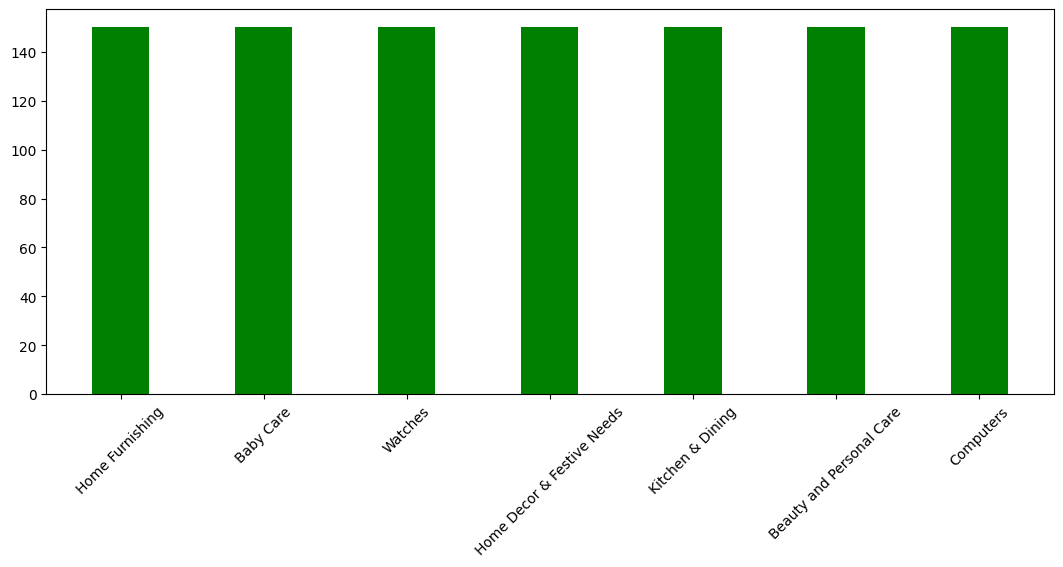

In [ ]:
fig = plt.figure(figsize = (13,5))
plt.bar(values.index, values, color = 'green', width = 0.4)
plt.xticks(rotation = 45)

"label

# PRE-PROCESSING

TOKENIZATION

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# We import 2 different tokenizer from scikit learn.


In [ ]:
doc= data1.sample(10)
doc

product_name  \
160    Rockmantra Classic Vintage Black Car Ceramic Mug   
43    Burt s Bees Hair Repair Shea And Grapefruit De...   
1019  PRINT SHAPES Power of roman reigns Laptop Skin...   
145             Prithish Abstract Design 40 Ceramic Mug   
790             LUBA HF45 Stylo Analog Watch  - For Men   
847   Rock Rocket Desktop Charger 6950290687051 USB ...   
901                  @home Earthy Wine Net Ceramic Vase   
613                 Piyo Piyo Four Stage Waterproof Bib   
641        Thakkar Baby Girl's Printed Top & Pyjama Set   
976                         LOTTIE LONDON MAKE ME BLUSH   

                                            description  labels  \
160   Rockmantra Classic Vintage Black Car Ceramic M...     5.0   
43    Key Features of Burt s Bees Hair Repair Shea A...     1.0   
1019  Key Features of PRINT SHAPES Power of roman re...     2.0   
145   Buy Prithish Abstract Design 40 Ceramic Mug fo...     5.0   
790   LUBA HF45 Stylo Analog Watch  - For Men - Buy ...     6.0   
847   Buy Rock Rocket Desktop Charger 6950290687051 ...     2.0   
901   Key Features of @home Earthy Wine Net Ceramic ...     3.0   
613   Specifications of Piyo Piyo Four Stage Waterpr...     0.0   
641   Specifications of Thakkar Baby Girl's Printed ...     0.0   
976   LOTTIE LONDON MAKE ME BLUSH (Pack of 1) Price:...     1.0   

                                     image                  label_name  
160   b5d1b8ef70b1ce27726f7f6c2f373e56.jpg            Kitchen & Dining  
43    2d50e4c6ccf8befe9335ac8f97a11712.jpg    Beauty and Personal Care  
1019  031c98cfde349d99fb6d5983f54c8751.jpg                   Computers  
145   60efd61370e70267dc60b11ff2bf974c.jpg            Kitchen & Dining  
790   75549ef6adc47e9b6dc2b69f530d9097.jpg                     Watches  
847   4f708bc74c4d29b2967dc38a1f5ae6d5.jpg                   Computers  
901   5c0fe2919e49f30aff91d46800cdf149.jpg  Home Decor & Festive Needs  
613   4e03d4e81e6a876f512536f6a57c053e.jpg                   Baby Care  
641   eaed0897074ee52230ff6c6d73c18dd4.jpg                   Baby Care  
976   fa2e5f01bbb642c49e4b2e19d2b39dcf.jpg    Beauty and Personal Care

In [ ]:
for idx, ser  in doc.iterrows():
    txt_output = f"Product : {ser['product_name']}\n"
    print(txt_output + ser['description'] + "..." + "\n\n")

Product : Rockmantra Classic Vintage Black Car Ceramic Mug
Rockmantra Classic Vintage Black Car Ceramic Mug (5.5 l)
                         Price: Rs. 199
				
Size : 3.5" X 4"
Size : 3.5" X 4"...


Product : Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner
Key Features of Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner Ideal For: Boys, Girls Applied For: Deep Conditioning Hair Condition: Damaged Hair Hair Type: Dry Hair,Specifications of Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner (147.5 ml) Conditioner Traits Hair Condition Damaged Hair Hair Type Dry Hair Applied For Deep Conditioning Ideal For Boys, Girls General Traits Brand Burt s Bees Quantity 147.5 ml Model Name Hair Repair Shea And Grapefruit Deep Conditioner In the Box 1 Conditioner...


Product : PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set
Key Features of PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set Glue Free Removal 15.6 inches 

In [ ]:
Mydata_description = data['description'].sample(3).to_numpy()
Mydata_description =  Mydata_description[2].lower()
Mydata_description

'key features of vatika advance standard idli maker 7 plates,vatika advance standard idli maker (7 plates , 12 idlis ) price: rs. 999 enjoy the most clean and hygienic cooking experience on those mornings with standard idli & dhokla maker from vatika. whether it masala idlis, chinese idlis or rava idlis, you can cook a variety of idlis in this idli maker you can cook dhokla also. constructed using high quality\xa0aluminum, this cookware ensures long-lasting durability. this idli maker comes with 1 idli cooker, 3 plate(12 idli blocks), 1 patra plate, 3 dhokla plates,specifications of vatika advance standard idli maker (7 plates , 12 idlis ) general brand vatika model number 1234 type standard material alluminium model name advance number of plates 7 number of cavities 3, 4, 5 color silver in the box 1 idli pot with 3 plate for idli and 3 plate for khaman dhokla and 1 plate for steam'

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer

First tokenizer = word_tokenize

## Essais

In [ ]:
def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

In [ ]:
tokens = word_tokenize (Mydata_description)
len(tokens)
tokens

LookupError: ignored

In [ ]:
display_tokens_info(tokens)

In [ ]:
tokens = wordpunct_tokenize (Mydata_description)
display_tokens_info(tokens)

Stopwords

In [ ]:
nltk.download('stopwords')

In [ ]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Second Tokenizer = RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(Mydata_description)
display_tokens_info(tokens) 

In [ ]:
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

In [ ]:
Sentence = "Demain, dès l'aube, je+partirai, vois-tu je ne puis demeurer loin de toi plus longtemps."
Sentence2 = " Pourquoi un chien très moche, un cheval2 lourdement fourbu, un rat*auraient-ils la vie, Et toi si belle, chatoiement sage, plus un souffle ? Tu ne reviendras plus, Jamais, jamais, jamais, jamais, jamais ! "
Sentence3 = "Heureux qui comme Ulysse a fait 1 beau voyage34 ou comme celui-là qui conquit la toison"

In [ ]:
text = ''.join(char for char in Sentence3 if not char.isdigit())
text

In [ ]:
Xanadu = "In Xanadu did Kubla Khan A stately pleasure-dome decree:Where Alph, the sacred river, ran Through caverns measureless to man Down to a sunless sea. So twice five miles of fertile groundWith walls and towers were girdled round; And there were gardens bright with sinuous rills, where blossomed many an incense-bearing tree; And here were forests ancient as the hills, Enfolding sunny spots of greenery."

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
# Sentence.replace('-', ' ')
tokens = tokenizer.tokenize(Sentence2)
Sentence2.lower()

NameError: ignored

In [ ]:
tokens = tokenizer.tokenize(Xanadu)
type(tokens)

list

In [ ]:
data1["label_name"]

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: label_name, Length: 1050, dtype: object

In [ ]:
tokens
#Let's see how the tokens look like

['In',
 'Xanadu',
 'did',
 'Kubla',
 'Khan',
 'A',
 'stately',
 'pleasure',
 'dome',
 'decree',
 'Where',
 'Alph',
 'the',
 'sacred',
 'river',
 'ran',
 'Through',
 'caverns',
 'measureless',
 'to',
 'man',
 'Down',
 'to',
 'a',
 'sunless',
 'sea',
 'So',
 'twice',
 'five',
 'miles',
 'of',
 'fertile',
 'groundWith',
 'walls',
 'and',
 'towers',
 'were',
 'girdled',
 'round',
 'And',
 'there',
 'were',
 'gardens',
 'bright',
 'with',
 'sinuous',
 'rills',
 'where',
 'blossomed',
 'many',
 'an',
 'incense',
 'bearing',
 'tree',
 'And',
 'here',
 'were',
 'forests',
 'ancient',
 'as',
 'the',
 'hills',
 'Enfolding',
 'sunny',
 'spots',
 'of',
 'greenery']

In [ ]:
!pip install texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.3-cp39-cp39-linux_x86_64.whl
  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached thinc-7.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached srsly-1.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: gensim
    Found existi

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-3.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached thinc-8.1.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (922 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (491 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
 

In [ ]:
import texthero as hero

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def affiche_wordcloud_hue(dataframe, variable, categories, nb_mots):

    liste_hue = dataframe[categories].unique().tolist()
    for cat in liste_hue:
        print('Mots les plus fréquents de la catégorie : ' + cat)
        hero.wordcloud(dataframe[dataframe[categories] == cat][variable],
                       max_words=nb_mots)
        plt.show()

 ## A function to prepare a document to be processed in a bag of words

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting rid of the most common words that belong to more than one category. Those words are unreleavant to identify a category from a description.
counter = CountVectorizer()
dfcount = pd.DataFrame()
DFlistes = []

for cat in data1['labels'].unique():
    X = counter.fit_transform(data1.loc[data1['labels']==cat, 'description'])
    Colonne = counter.get_feature_names_out ()
    dfcount1 = pd.DataFrame(X.toarray().transpose(), Colonne)
    dfcount1["Sum" + str(cat)] = dfcount1.sum(axis=1).values
    DFlistes.append(dfcount1)

DF1 = DFlistes[0].loc[:, "Sum4.0"]
DF2 = DFlistes[1].loc[:, "Sum0.0"]
DF3 = DFlistes[2].loc[:, "Sum6.0"]
DF4 = DFlistes[3].loc[:, "Sum3.0"]
DF5 = DFlistes[4].loc[:, "Sum5.0"]
DF6 = DFlistes[5].loc[:, "Sum1.0"]
DF7 = DFlistes[6].loc[:, "Sum2.0"]

Mystopwords = []

DFFsum = pd.DataFrame([DF1, DF2, DF3, DF4, DF5, DF6, DF7]).transpose()
DFFsum["Sums"] = DFFsum.sum(axis=1)
DFFsum = DFFsum.sort_values(by="Sums", ascending=False)
DFFsum.head(50)
Mystopwords = [w for w in (DFFsum.index.tolist()) if len(w)>2]
Mystopwords = Mystopwords[0:20]

#  TOKENIZATION

def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])


# WORDS FILTERING
def stop_word_filter_fct(list_words) :
    adverbs_and_adjectives = []
    filtered_w = [w for w in list_words if w not in stop_words]
    filtered_w1 = [w for w in filtered_w if w not in Mystopwords]
    filtered_w2 = [w for w in filtered_w1 if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w2)
    for t in range(len(filtered_w3)):
        if (filtered_w3[t][1] == 'RB'):
            # or filtered_w3[t][1] == 'CD'):
        #  or filtered_w3[t][1] == 'JJ' or filtered_w3[t][1] == 'VBP'):
            adverbs_and_adjectives.append(filtered_w3[t][0])
    filtered_w = [w for w in filtered_w2 if w not in adverbs_and_adjectives]

    return filtered_w

# LEMMATIZATION
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# STEMATIZATION
def stema_fct(list_words) : 
        stemmer = SnowballStemmer ( "english", ignore_stopwords=True)
        stem_w = [stemmer.stem(w) for w in list_words]
        return stem_w

# PREPARING A BAG OF WORDS
 
def transform_for_bagging (tokenizer,
                            document,
                            rejoin=False) :

    document = document.lower().strip()
    # Strip to remove space at the beginning and at the end of the document
        
    tokens = tokenizer.tokenize(document)
    
    tokens_filtered = stop_word_filter_fct(tokens)
    
    tokens_filtered_stemmatized = stema_fct(tokens_filtered)

    tokens_filtered_lemmatised  = lemma_fct(tokens_filtered_stemmatized)
    

    if rejoin:
        tokens_filtered_lemmatised = " ".join(tokens_filtered_lemmatised)
        tokens_filtered_lemmatised = ''.join(char for char in tokens_filtered_lemmatised if not char.isdigit())
        return tokens_filtered_lemmatised
    return tokens_filtered_lemmatised

In [ ]:
Mystopwords
# the 20 first un releavant words (longer than 3 letters)

['for',
 'the',
 'and',
 'only',
 'with',
 'your',
 'products',
 'free',
 'buy',
 'delivery',
 'shipping',
 'cash',
 'genuine',
 'replacement',
 'day',
 'flipkart',
 'com',
 'guarantee',
 'this',
 'online']

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('all-corpora') 

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading pack

True

In [ ]:
Sentence3 = "Heureux qui comme Ulysse a Hg22hh fait 1 beau voyage34 ou comme celui-là qui conquit la toison"

In [ ]:
My_sentence = transform_for_bagging(tokenizer, Sentence3, rejoin=True)
My_sentence

'heureux qui comm ulyss hghh fait beau voyage comm celui qui conquit toison'

In [ ]:
My_sentence = transform_for_bagging(tokenizer, data1['description'][0], rejoin=True)
type(My_sentence)
My_sentence

'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain  height pack price  curtain enhanc look interior curtain made  high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide draw first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyous beauti given sooth print bring home eleg curtain filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain  height pack general brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length  box number content sale packag pack sale packag curtain bodi design materi polyest'

In [ ]:
My_sentence = transform_for_bagging(tokenizer, data1['description'][0], rejoin=False)
type(My_sentence)
My_sentence

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'height',
 'pack',
 'price',
 '899',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 '100',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'draw',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyous',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg

In [ ]:
data1["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))


0       key featur eleg polyest multicolor abstract ey...
1       specif sathiya cotton bath towel bath towel re...
2       key featur eurospa cotton terri face towel set...
3       key featur santosh royal fashion cotton print ...
4       key featur jaipur print cotton floral king siz...
                              ...                        
1045    oren empow extra larg self adhes sticker pack ...
1046    wallmantra larg vinyl sticker sticker pack pri...
1047    uberlyf extra larg pigment polyvinyl film impo...
1048    wallmantra medium vinyl sticker sticker  wallm...
1049    uberlyf larg vinyl sticker  uberlyf larg vinyl...
Name: description, Length: 1050, dtype: object

In [ ]:
data_filtered = pd.DataFrame()
data_filtered['description'] = data1["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))
data_filtered['product_name'] = data1["product_name"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))

In [ ]:
data_filtered['Name_and_Description'] = data_filtered["description"] + data_filtered["product_name"]
data_filtered['Name_and_Description'][2]


'key featur eurospa cotton terri face towel set size small height inch gsm  eurospa cotton terri face towel set piec face towel set assort price  eurospa bring design  soft cotton towel export qualiti soft textur take care skin give enrich feel deserv eurospa export bath towel lot renown brand last year famous fine print absorb soft durabl note product  cotton suscept shrinkag product color may vari pictur size may vari wash care wash cold water iron bleach flat dri wash size face towel cm cm specif eurospa cotton terri face towel set piec face towel set assort bath towel featur materi cotton terri design shuvam general brand eurospa gsm  type face towel set name shuvampcftsetassort ideal boy girl men woman shuvampcftsetassort size small color assort dimens weight  length inch width inch box number content sale packag sale packag piec face towel seteurospa cotton terri face towel set'

In [ ]:
data_filtered["labels_num"] = data1['labels']
data_filtered["label_name"] = data1["label_name"] 

In [ ]:
data_filtered

description  \
0     key featur eleg polyest multicolor abstract ey...   
1     specif sathiya cotton bath towel bath towel re...   
2     key featur eurospa cotton terri face towel set...   
3     key featur santosh royal fashion cotton print ...   
4     key featur jaipur print cotton floral king siz...   
...                                                 ...   
1045  oren empow extra larg self adhes sticker pack ...   
1046  wallmantra larg vinyl sticker sticker pack pri...   
1047  uberlyf extra larg pigment polyvinyl film impo...   
1048  wallmantra medium vinyl sticker sticker  wallm...   
1049  uberlyf larg vinyl sticker  uberlyf larg vinyl...   

                                           product_name  \
0     eleg polyest multicolor abstract eyelet door c...   
1                             sathiya cotton bath towel   
2                   eurospa cotton terri face towel set   
3     santosh royal fashion cotton print king size d...   
4     jaipur print cotton floral king size doubl bed...   
...                                                 ...   
1045           oren empow extra larg self adhes sticker   
1046              wallmantra larg vinyl sticker sticker   
1047  uberlyf extra larg pigment polyvinyl film impo...   
1048            wallmantra medium vinyl sticker sticker   
1049                         uberlyf larg vinyl sticker   

                                   Name_and_Description  labels_num  \
0     key featur eleg polyest multicolor abstract ey...         4.0   
1     specif sathiya cotton bath towel bath towel re...         0.0   
2     key featur eurospa cotton terri face towel set...         0.0   
3     key featur santosh royal fashion cotton print ...         4.0   
4     key featur jaipur print cotton floral king siz...         4.0   
...                                                 ...         ...   
1045  oren empow extra larg self adhes sticker pack ...         0.0   
1046  wallmantra larg vinyl sticker sticker pack pri...         0.0   
1047  uberlyf extra larg pigment polyvinyl film impo...         0.0   
1048  wallmantra medium vinyl sticker sticker  wallm...         0.0   
1049  uberlyf larg vinyl sticker  uberlyf larg vinyl...         0.0   

           label_name  
0     Home Furnishing  
1           Baby Care  
2           Baby Care  
3     Home Furnishing  
4     Home Furnishing  
...               ...  
1045        Baby Care  
1046        Baby Care  
1047        Baby Care  
1048        Baby Care  
1049        Baby Care  

[1050 rows x 5 columns]

In [ ]:
My_data_description = data_filtered['description']
My_data_product_name = data_filtered['product_name']
My_data_Name_and_Description = data_filtered['Name_and_Description']


In [ ]:
My_data_product_name[7]
# it is an example. 

'star uft tsw  analog watch boy'

In [ ]:
array_description = My_data_description.to_numpy().tolist()
array_product_name = My_data_product_name.to_numpy().tolist()
array_Name_and_Description = My_data_Name_and_Description.to_numpy().tolist()

In [ ]:
data_filteredforWord2vec = pd.DataFrame()
data_filteredforWord2vec['description'] = data_filtered["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=False))
data_filteredforWord2vec['product_name'] = data_filtered["product_name"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=False))

In [ ]:
# Below we will do a Word2Vec embedding that requires the documents to be in a particular format.
data_filteredforWord2vec['Name_and_Description'] = data_filteredforWord2vec["description"] + data_filteredforWord2vec["product_name"]
data_filteredforWord2vec["labels_num"] = data1['labels']
data_filteredforWord2vec["label_name"] = data1["label_name"] 
data_filteredforWord2vec.to_csv('dataingoodformat.csv')
data_filteredforWord2vec


description  \
0     [key, featur, eleg, polyest, multicolor, abstr...   
1     [specif, sathiya, cotton, bath, towel, bath, t...   
2     [key, featur, eurospa, cotton, terri, face, to...   
3     [key, featur, santosh, royal, fashion, cotton,...   
4     [key, featur, jaipur, print, cotton, floral, k...   
...                                                 ...   
1045  [oren, empow, extra, larg, self, adh, sticker,...   
1046  [wallmantra, larg, vinyl, sticker, sticker, pa...   
1047  [uberlyf, extra, larg, pigment, polyvinyl, fil...   
1048  [wallmantra, medium, vinyl, sticker, sticker, ...   
1049  [uberlyf, larg, vinyl, sticker, uberlyf, larg,...   

                                           product_name  \
0     [eleg, polyest, multicolor, abstract, eyelet, ...   
1                        [sathiya, cotton, bath, towel]   
2            [eurospa, cotton, terri, face, towel, set]   
3     [santosh, royal, fashion, cotton, print, king,...   
4     [jaipur, print, cotton, floral, king, size, do...   
...                                                 ...   
1045     [oren, empow, extra, larg, self, adh, sticker]   
1046        [wallmantra, larg, vinyl, sticker, sticker]   
1047  [uberlyf, extra, larg, pigment, polyvinyl, fil...   
1048      [wallmantra, medium, vinyl, sticker, sticker]   
1049                    [uberlyf, larg, vinyl, sticker]   

                                   Name_and_Description  labels_num  \
0     [key, featur, eleg, polyest, multicolor, abstr...         4.0   
1     [specif, sathiya, cotton, bath, towel, bath, t...         0.0   
2     [key, featur, eurospa, cotton, terri, face, to...         0.0   
3     [key, featur, santosh, royal, fashion, cotton,...         4.0   
4     [key, featur, jaipur, print, cotton, floral, k...         4.0   
...                                                 ...         ...   
1045  [oren, empow, extra, larg, self, adh, sticker,...         0.0   
1046  [wallmantra, larg, vinyl, sticker, sticker, pa...         0.0   
1047  [uberlyf, extra, larg, pigment, polyvinyl, fil...         0.0   
1048  [wallmantra, medium, vinyl, sticker, sticker, ...         0.0   
1049  [uberlyf, larg, vinyl, sticker, uberlyf, larg,...         0.0   

           label_name  
0     Home Furnishing  
1           Baby Care  
2           Baby Care  
3     Home Furnishing  
4     Home Furnishing  
...               ...  
1045        Baby Care  
1046        Baby Care  
1047        Baby Care  
1048        Baby Care  
1049        Baby Care  

[1050 rows x 5 columns]

In [ ]:
My_data_Name_and_Description

0       key featur eleg polyest multicolor abstract ey...
1       specif sathiya cotton bath towel bath towel re...
2       key featur eurospa cotton terri face towel set...
3       key featur santosh royal fashion cotton print ...
4       key featur jaipur print cotton floral king siz...
                              ...                        
1045    oren empow extra larg self adhes sticker pack ...
1046    wallmantra larg vinyl sticker sticker pack pri...
1047    uberlyf extra larg pigment polyvinyl film impo...
1048    wallmantra medium vinyl sticker sticker  wallm...
1049    uberlyf larg vinyl sticker  uberlyf larg vinyl...
Name: Name_and_Description, Length: 1050, dtype: object

In [ ]:
os.environ["OMP_NUM_THREADS"] = "5"

Mots les plus fréquents de la catégorie : Home Furnishing


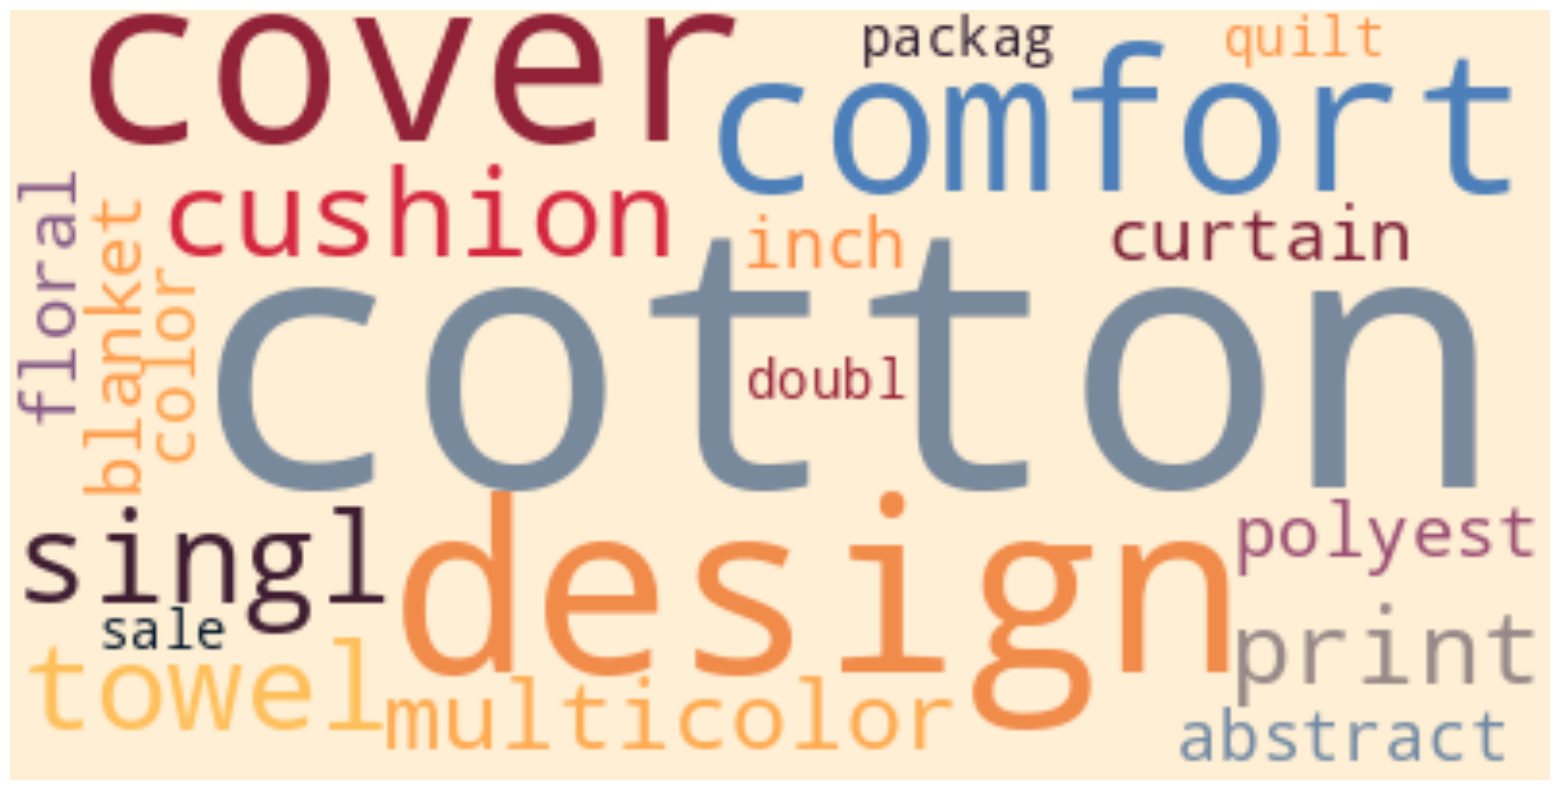

Mots les plus fréquents de la catégorie : Baby Care


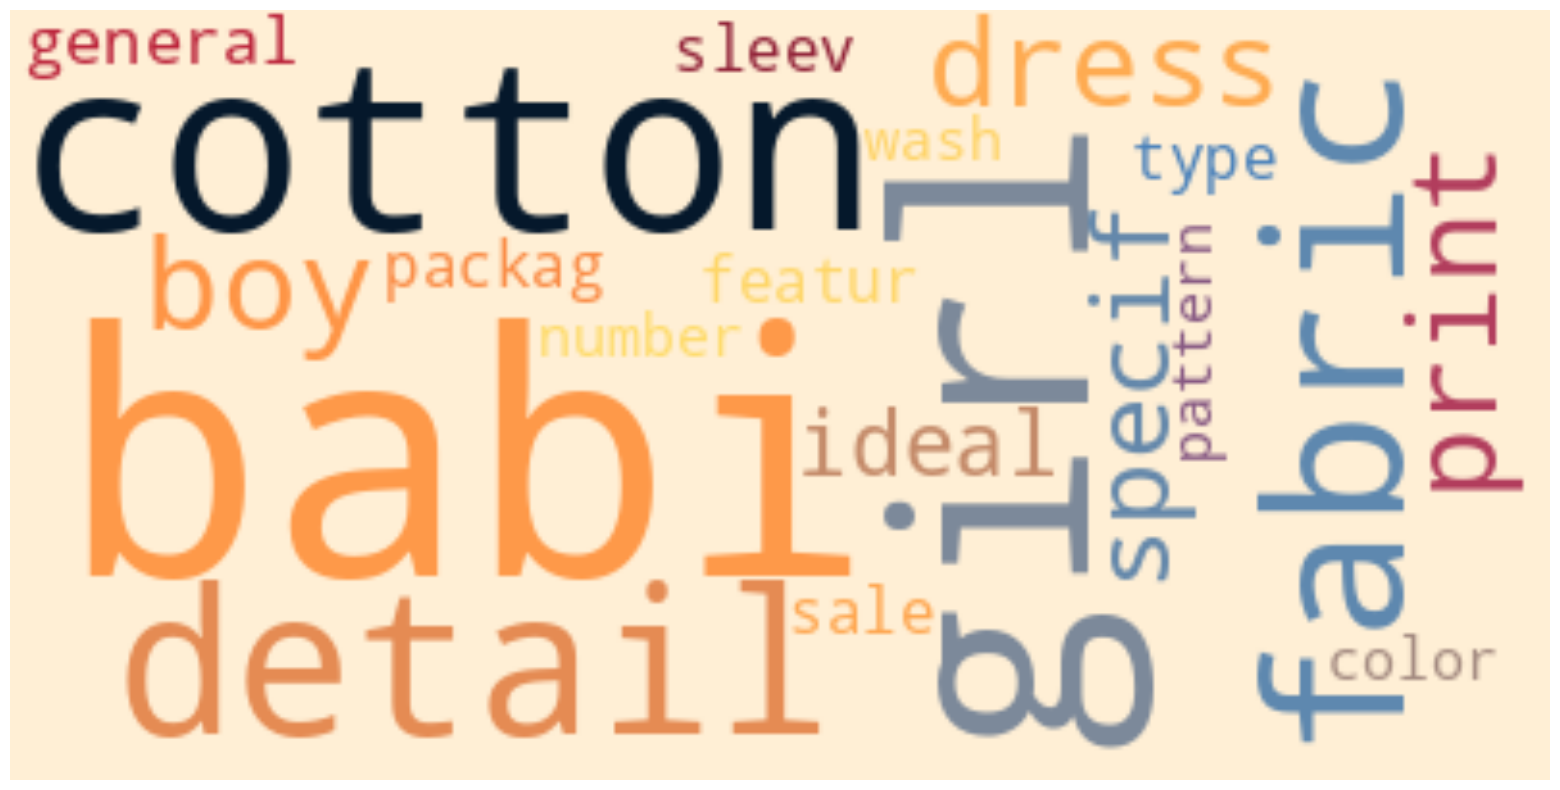

Mots les plus fréquents de la catégorie : Watches


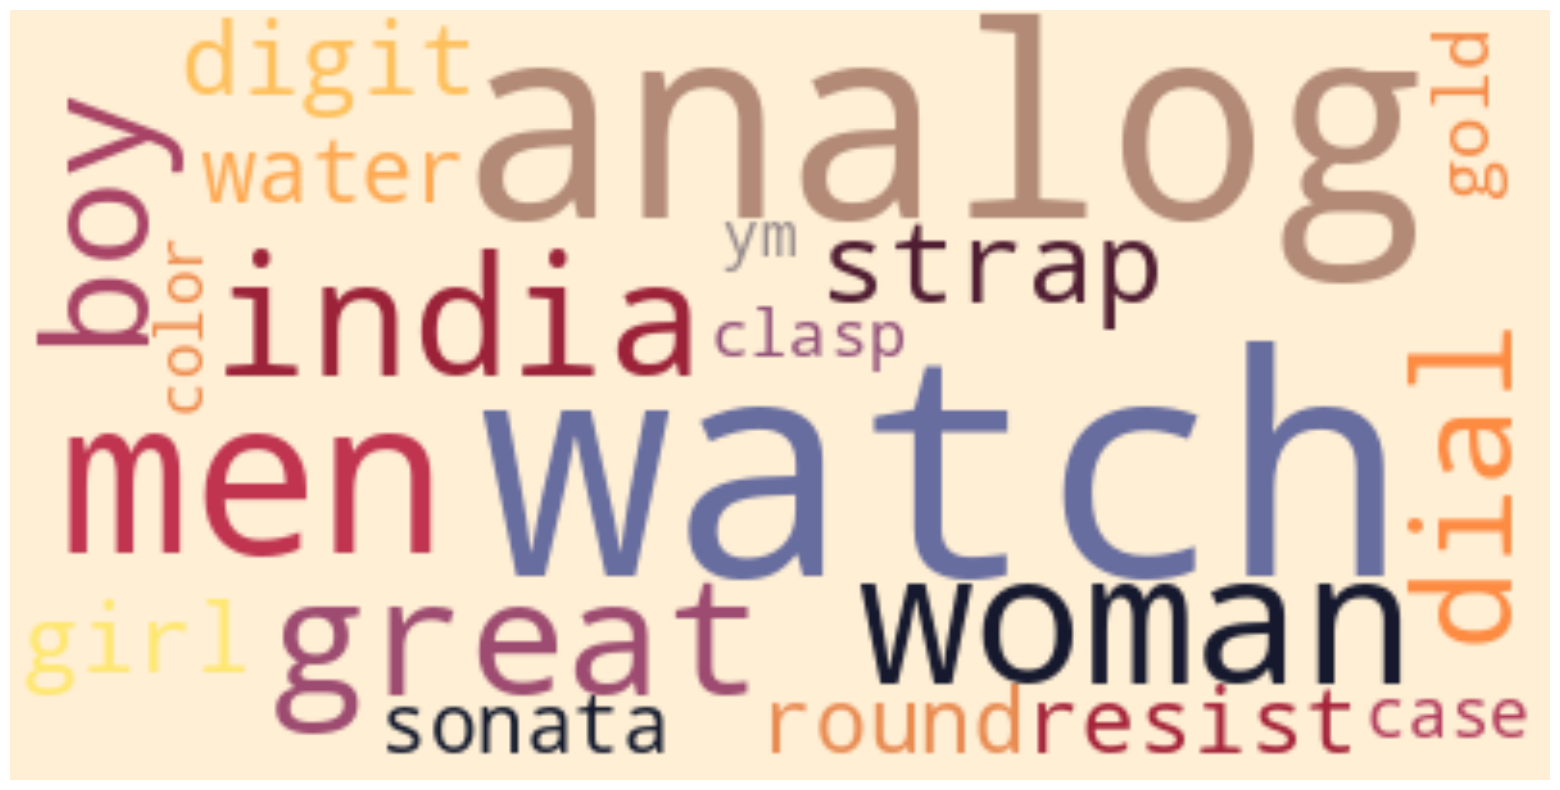

Mots les plus fréquents de la catégorie : Home Decor & Festive Needs


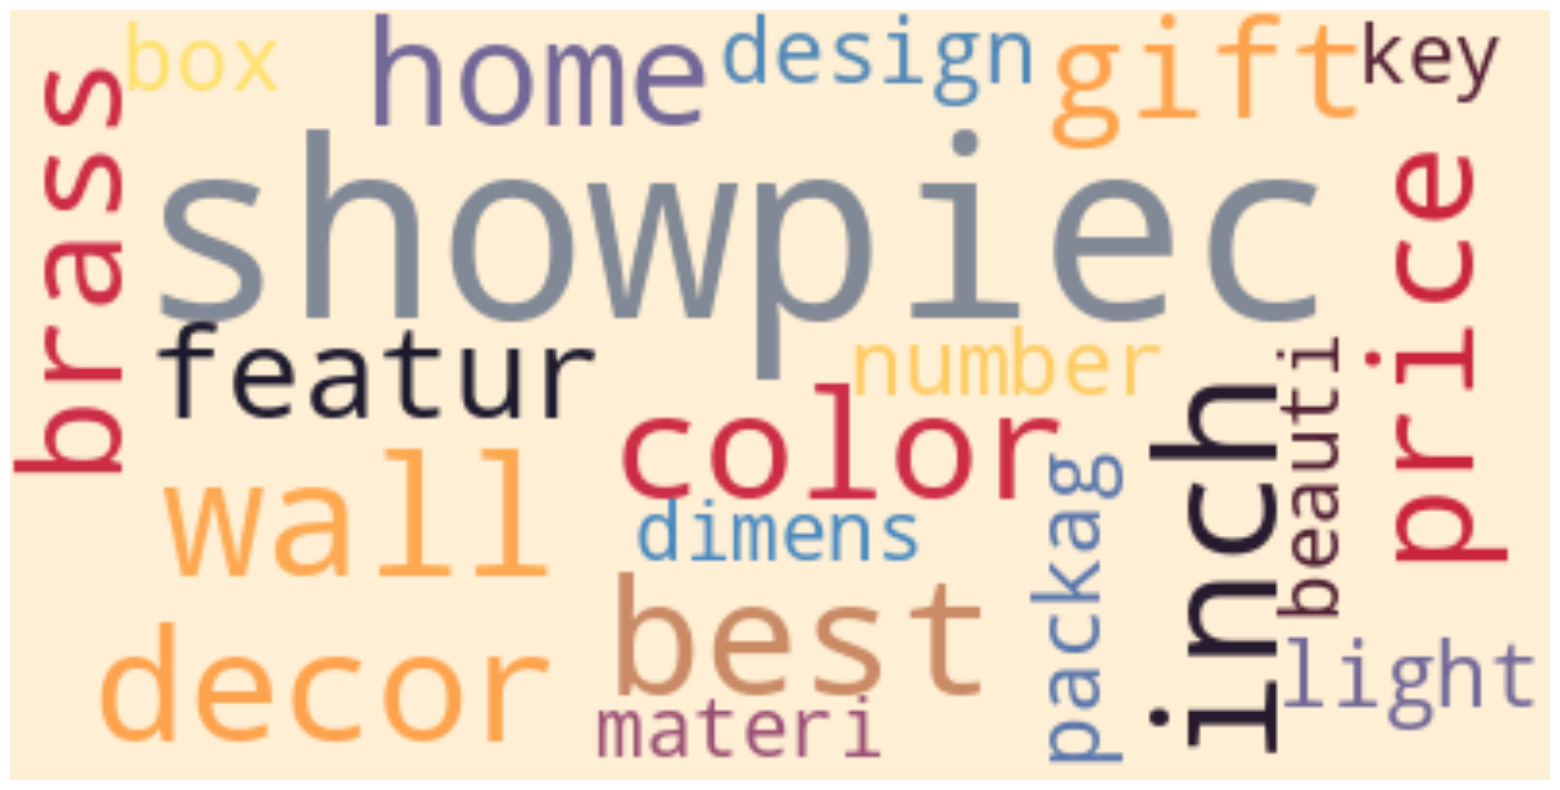

Mots les plus fréquents de la catégorie : Kitchen & Dining


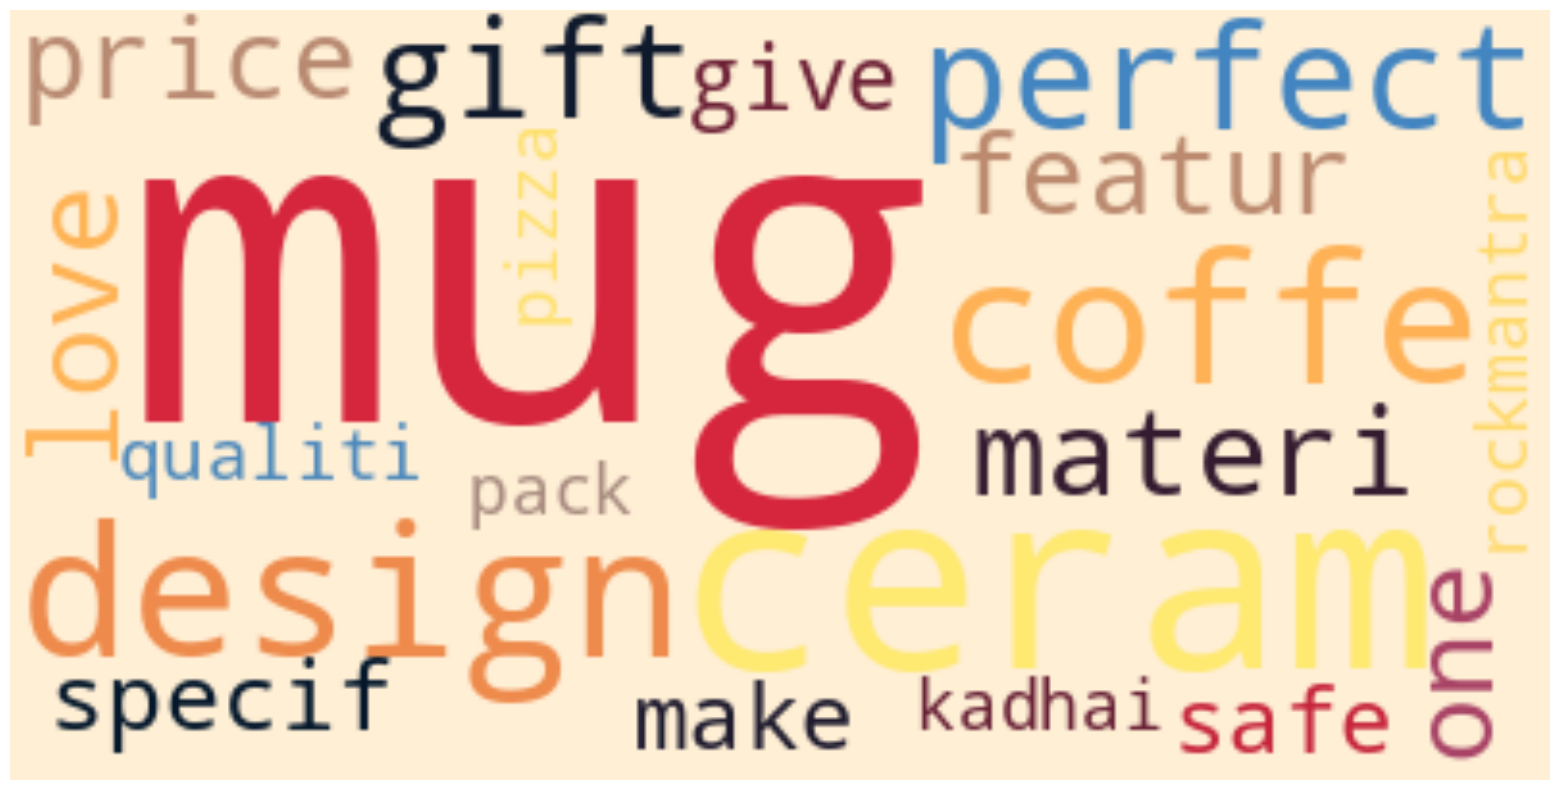

Mots les plus fréquents de la catégorie : Beauty and Personal Care


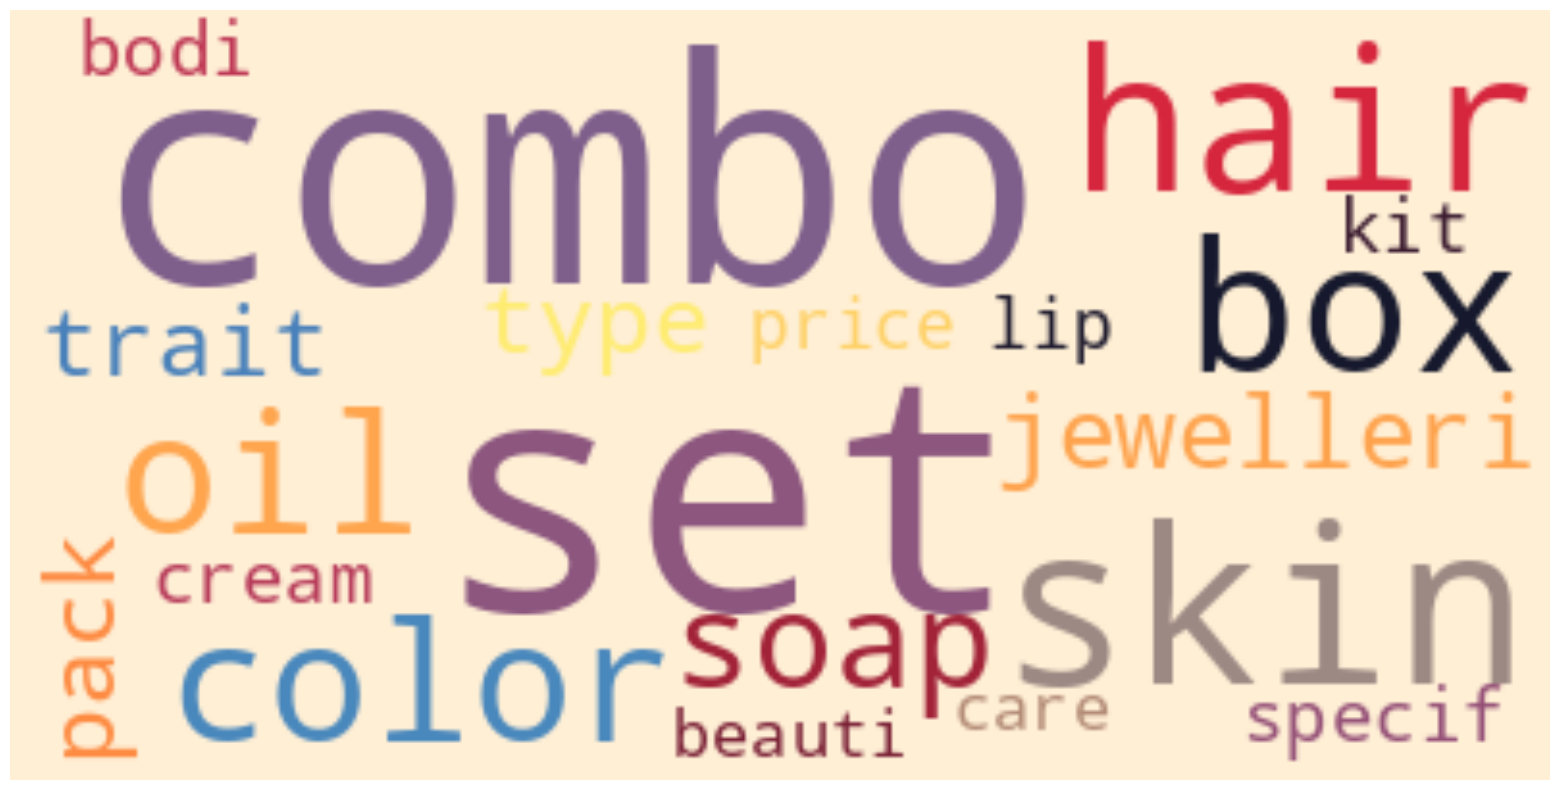

Mots les plus fréquents de la catégorie : Computers


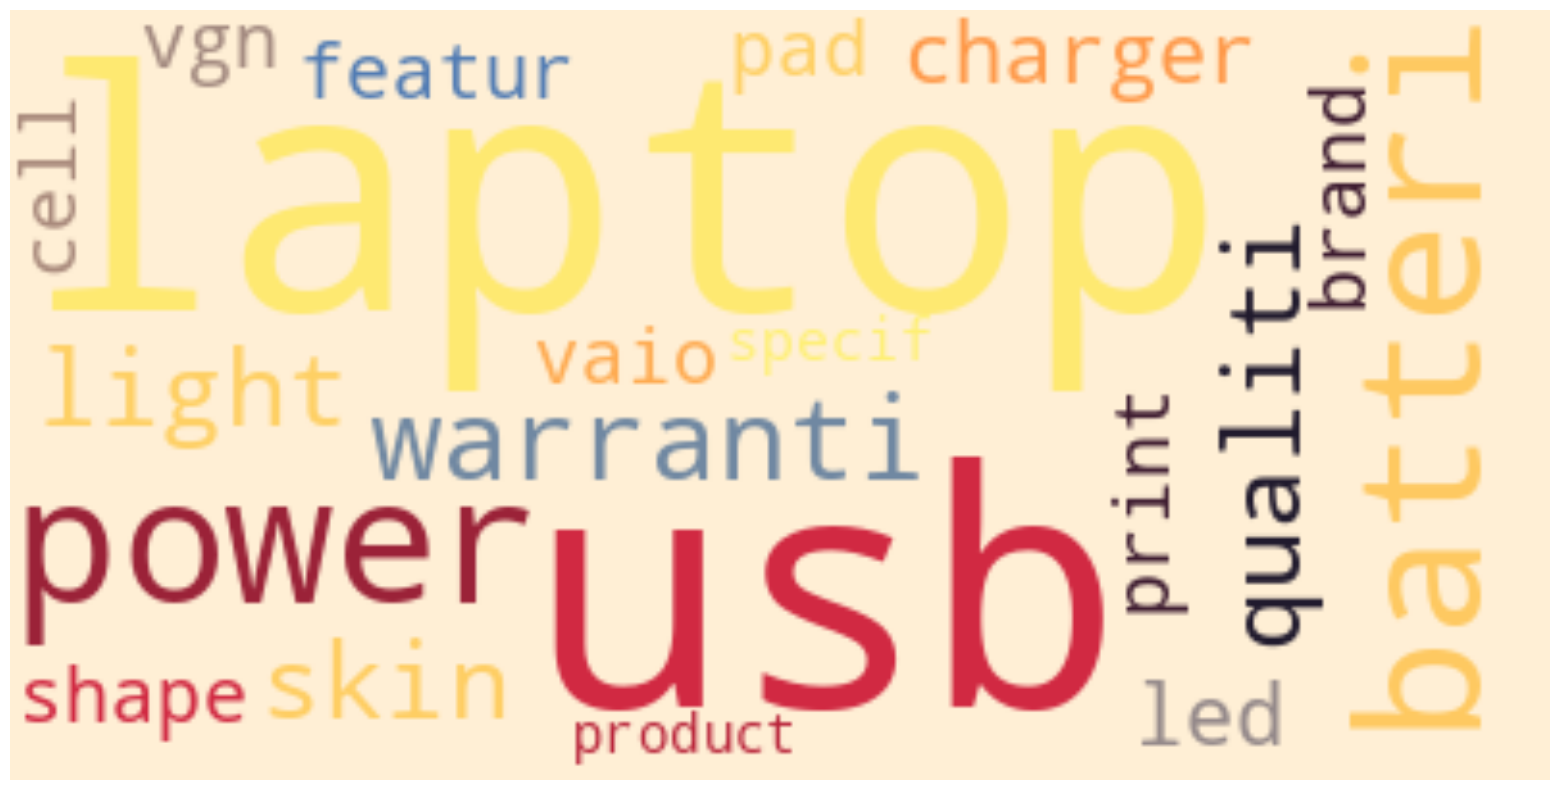

In [ ]:
affiche_wordcloud_hue(data_filtered,'Name_and_Description','label_name',20)

# Complete function

In [ ]:
import numpy

In [ ]:

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.95,
    min_df=1,
    ngram_range=(1, 1))

count_vectorizer = CountVectorizer( 
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=0.05,
    ngram_range=(1, 1))


Result_grid = {
    'Method' : [],
    'Corpus' : [],
    'ARI score' : [],
    'fit_data' : []
}    

def Vectorizing (vectorizer, corpus, fit_data):
    # a function that vectorizes, does clutering, calculate ARI score
    
    vectorizer.fit(fit_data)
    X = vectorizer.transform(corpus)
    Colonnes = vectorizer.get_feature_names_out ()
    df_X_to_plot = pd.DataFrame(data = X.todense(), columns=Colonnes)
    
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(df_X_to_plot)

    kmeans = KMeans (n_clusters= 7, n_init='auto', random_state = 42, init='random')
    kmeans.fit(X_tsne)
    labels_predicted = kmeans.labels_
    centroids = kmeans.cluster_centers_

    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    # Result_grid_df = pd.DataFrame(Result_grid)

    return {"vectorized_data" : df_X_to_plot, "Ari_score" : ARI, 'Centroids' : centroids, "Xdense":X}
 

param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer],
    'Corpus' : [My_data_Name_and_Description, My_data_description, My_data_product_name],
    'Data_fit' : [My_data_Name_and_Description, My_data_description, My_data_product_name]
    }))



In [ ]:
tfidf_vectorizer.fit(My_data_Name_and_Description)
X = tfidf_vectorizer.transform(My_data_Name_and_Description)
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
Colonnes = tfidf_vectorizer.get_feature_names_out ()
df_X_to_plot = pd.DataFrame(data = X.todense(), columns=Colonnes)
df_X_to_plot
X = PCA_reduction(df_X_to_plot, 0.95)
X.shape

NameError: ignored

In [ ]:
numpy.__version__

'1.22.4'

In [ ]:
X_tsne = tsne.fit_transform(X)

In [ ]:

for param in param_grid:
   Vector = Vectorizing(param['Method'], param['Corpus'], param['Data_fit'])
   Result_grid['ARI score'].append(Vector['Ari_score'])
   Result_grid['Method'].append(param['Method'])
   Result_grid['Corpus'].append(param['Corpus'][:0])
   Result_grid['fit_data'].append(param['Data_fit'][:0])


# Display results. 
Result_grid_df = pd.DataFrame(Result_grid)
print(Result_grid_df)

                                              Method  \
0  TfidfVectorizer(max_df=0.95, stop_words='engli...   
1  TfidfVectorizer(max_df=0.95, stop_words='engli...   
2  TfidfVectorizer(max_df=0.95, stop_words='engli...   
3  TfidfVectorizer(max_df=0.95, stop_words='engli...   
4  TfidfVectorizer(max_df=0.95, stop_words='engli...   
5  TfidfVectorizer(max_df=0.95, stop_words='engli...   
6  TfidfVectorizer(max_df=0.95, stop_words='engli...   
7  TfidfVectorizer(max_df=0.95, stop_words='engli...   
8  TfidfVectorizer(max_df=0.95, stop_words='engli...   

                                              Corpus  ARI score  \
0  Series([], Name: Name_and_Description, dtype: ...   0.481826   
1  Series([], Name: Name_and_Description, dtype: ...   0.584114   
2  Series([], Name: Name_and_Description, dtype: ...   0.441635   
3       Series([], Name: description, dtype: object)   0.561864   
4       Series([], Name: description, dtype: object)   0.327564   
5       Series([], Name: description,

In [ ]:
Result_grid_df

Method  \
0  TfidfVectorizer(max_df=0.95, stop_words='engli...   
1  TfidfVectorizer(max_df=0.95, stop_words='engli...   
2  TfidfVectorizer(max_df=0.95, stop_words='engli...   
3  TfidfVectorizer(max_df=0.95, stop_words='engli...   
4  TfidfVectorizer(max_df=0.95, stop_words='engli...   
5  TfidfVectorizer(max_df=0.95, stop_words='engli...   
6  TfidfVectorizer(max_df=0.95, stop_words='engli...   
7  TfidfVectorizer(max_df=0.95, stop_words='engli...   
8  TfidfVectorizer(max_df=0.95, stop_words='engli...   

                                              Corpus  ARI score  \
0  Series([], Name: Name_and_Description, dtype: ...   0.481826   
1  Series([], Name: Name_and_Description, dtype: ...   0.584114   
2  Series([], Name: Name_and_Description, dtype: ...   0.441635   
3       Series([], Name: description, dtype: object)   0.561864   
4       Series([], Name: description, dtype: object)   0.327564   
5       Series([], Name: description, dtype: object)   0.366944   
6      Series([], Name: product_name, dtype: object)   0.385870   
7      Series([], Name: product_name, dtype: object)   0.455296   
8      Series([], Name: product_name, dtype: object)   0.496071   

                                            fit_data  
0  Series([], Name: Name_and_Description, dtype: ...  
1       Series([], Name: description, dtype: object)  
2      Series([], Name: product_name, dtype: object)  
3  Series([], Name: Name_and_Description, dtype: ...  
4       Series([], Name: description, dtype: object)  
5      Series([], Name: product_name, dtype: object)  
6  Series([], Name: Name_and_Description, dtype: ...  
7       Series([], Name: description, dtype: object)  
8      Series([], Name: product_name, dtype: object)

In [ ]:
dataFinal = Vectorizing (tfidf_vectorizer, My_data_Name_and_Description, My_data_description)["vectorized_data"]

In [ ]:
dataFinal.shape
# This dataframe will be used for dimensional reduction. 

(1050, 3848)

In [ ]:
dataFinal

_blk   _g   _w  aaa  aapno  aari  aarika  abil  abkl_grn_grn_grn  \
0      0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
1      0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
2      0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
3      0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
4      0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
...    ...  ...  ...  ...    ...   ...     ...   ...               ...   
1045   0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
1046   0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
1047   0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
1048   0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   
1049   0.0  0.0  0.0  0.0    0.0   0.0     0.0   0.0               0.0   

      abkl_pl_pl_pnk  abkl_pl_pnk_pnk  abl  abod  abras  absolut    absorb  \
0                0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
1                0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
2                0.0              0.0  0.0   0.0    0.0      0.0  0.050484   
3                0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
4                0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
...              ...              ...  ...   ...    ...      ...       ...   
1045             0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
1046             0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
1047             0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
1048             0.0              0.0  0.0   0.0    0.0      0.0  0.000000   
1049             0.0              0.0  0.0   0.0    0.0      0.0  0.000000   

      abstract  abstrct   ac  accent  access  accessori  accid  accident  \
0     0.202522      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1     0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
2     0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
3     0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
4     0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
...        ...      ...  ...     ...     ...        ...    ...       ...   
1045  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1046  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1047  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1048  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   
1049  0.000000      0.0  0.0     0.0     0.0        0.0    0.0       0.0   

      accommod  accomplish  accord  acer  ach  aci  acid  acl  acn  acryl  \
0          0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
1          0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
2          0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
3          0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
4          0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
...        ...         ...     ...   ...  ...  ...   ...  ...  ...    ...   
1045       0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
1046       0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
1047       0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
1048       0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   
1049       0.0         0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0    0.0   

      act  activ  actu  actual  actx  acu   ad  adaa  adapt  adaptor  add  \
0     0.0    0.0   0.0     0.0   0.0  0.0  0.0   0.0    0.0      0.0  0.0   
1     0.0    0.0   0.0     0.0   0.0  0.0  0.0   0.0    0.0      0.0  0.0   
2     0.0    0.0   0.0     0.0   0.0  0.0  0.0   0.0    0.0      0.0  0.0   
3     0.0    0.0   0.0     0.0   0

In [ ]:
labels = data1['labels'].unique().tolist()
labelss=[]
for item in labels:
    labelss.append(int(item))

In [ ]:
labelss = sorted(labelss)
labelss

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
sns.color_palette()[9]

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)

In [ ]:
colors = {label: sns.color_palette()[label] for label in labelss}
colors

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

In [ ]:
idx = data_filtered.index
label_sample = data1.loc[idx, "labels"]
label_sample 

0       4.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: labels, Length: 1050, dtype: float64

## Plot TSNE

In [ ]:
from sklearn.manifold import TSNE
def plot_TSNE (dataframe):
# A function that creates 2 figures : 1) 
    

    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]
    # Those are the true labels

    
    
    T_sne = TSNE(n_components=2,
            perplexity=30,
            n_iter=2000, 
            init='random',
            learning_rate=200,
            random_state=42).fit_transform(dataframe)
    
    kmeans = KMeans (n_clusters= 7, n_init = 'auto', random_state = 42, init='random')
    kmeans.fit(T_sne)
    kmeans_cls = kmeans.labels_

    ARI = adjusted_rand_score (label_sample, kmeans_cls)

 # Creating figure:
    fig = plt.figure(figsize=(15, 6))
    sns.set_style("whitegrid")
    colors = {label: sns.color_palette('Set1')[label] for label in labelss}
    # transformed_centroid= TSNE(n_components=2,
    #         perplexity=6,
    #         init='pca',
    #         random_state=42).fit_transform(Vectorizing[dataframe]['Centroids'])
  
# FIRST FIGURE

    ax = fig.add_subplot(1,2,1)
    ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c = label_sample.map(colors),
        alpha = 0.4,
        )
    plt.title('Représentation des products par catégorie')

    
    ax.grid(False)
    ax.axis('off')
    
    # Creating legend
    handles = []
    for lab in labelss:
        lab_patch = mpatches.Patch(color=sns.color_palette('Set1')[lab],
                                    label=f"categorie {lab}\n")
        handles.append(lab_patch)
    
    fig.legend(
      handles=handles,
      loc='upper right', 
      ncol=1,
      bbox_to_anchor=(0.5,0.98,0,0),
      facecolor='whitesmoke',
      edgecolor='white',
      handlelength=1
      )

# SECOND FIGURE

    ax = fig.add_subplot(1,2,2)
    scatter = ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c=kmeans_cls,
        cmap='Set2',
        alpha = 0.4,)
    # ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des products par cluster')
    # ax.scatter(transformed_centroid[: 0], transformed_centroid[:, 1],c='red', s=150, alpha=0.4)
    ax.grid(False)
    ax.axis('off')

    # Creating legend
    handles = []
    for lab in labelss:
        lab_patch = mpatches.Patch(color=sns.color_palette('Set2')[lab],
                                    label=f"cluster {lab}\n")
        handles.append(lab_patch)
    
    fig.legend(
      handles=handles,
      loc='upper right', 
      ncol=1,
      bbox_to_anchor=(0.9,0.98,0,0),
      facecolor='whitesmoke',
      edgecolor='white',
      handlelength=1
      )
    
    print ("ARI SCORE: ", ARI)
    return kmeans_cls

ARI SCORE:  0.5841135096007113


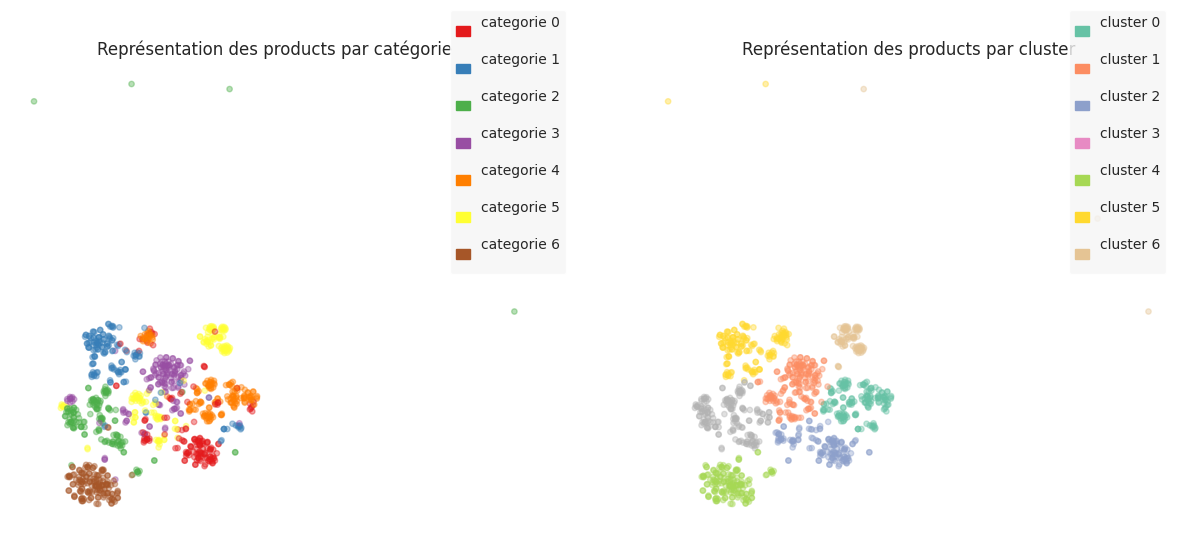

In [ ]:
Kmeanslabels = plot_TSNE(dataFinal)

## Dimensional reduction

### Through a PCA

In [ ]:
dataFinal.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The nexts cells bring no advantage at all.

In [ ]:
def PCA_reduction (X, N_components_ratio):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=N_components_ratio)
    X_projected = pca.fit_transform(X_scaled)
    return X_projected

In [ ]:
X_dense_Projected  = PCA_reduction (dataFinal.to_numpy(), 0.99)
X_dense_Projected.shape

(1050, 824)

In [ ]:
T_sne = TSNE(n_components=2,
            perplexity=30,
            n_iter=2000, 
            init='pca',
            random_state=42).fit_transform(X_dense_Projected)

In [ ]:
Kmeans_pca = KMeans(n_clusters=7, random_state=42)
Kmeans_pca.fit(T_sne)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [ ]:
data_filtered['segment k_means PCA'] = Kmeanslabels
data_filtered['segment k_means PCA'].value_counts()

1    179
6    174
3    162
0    159
4    159
2    136
5     81
Name: segment k_means PCA, dtype: int64

In [ ]:
ARI = adjusted_rand_score (data_filtered['labels_num'], data_filtered['segment k_means PCA'])
ARI

0.5841135096007113

In [ ]:
def Confusionmatrix (dataframe):

    import seaborn as sn
    import matplotlib.pyplot as plt
    kmeans = KMeans (n_clusters= 7, n_init='auto', random_state = 42, init='random')

    # Setting the variables to keep
    features_std = dataframe

    # fitting the model
    kmeans.fit(features_std)

    # getting the predicted labels
    labels_pred = kmeans.labels_

    # Create crosstab: ct
    ct = pd.crosstab(data1['labels'], labels_pred)

    # plot the heatmap
    plt.figure(figsize = (10,7))
    ax = sn.heatmap(ct, annot=True, fmt='g')
    ax.set_xlabel('clusters')
    ax.set_ylabel('product categories')

    # fix a displaying problem
    ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)

## graphing

ARI SCORE:  0.5841135096007113


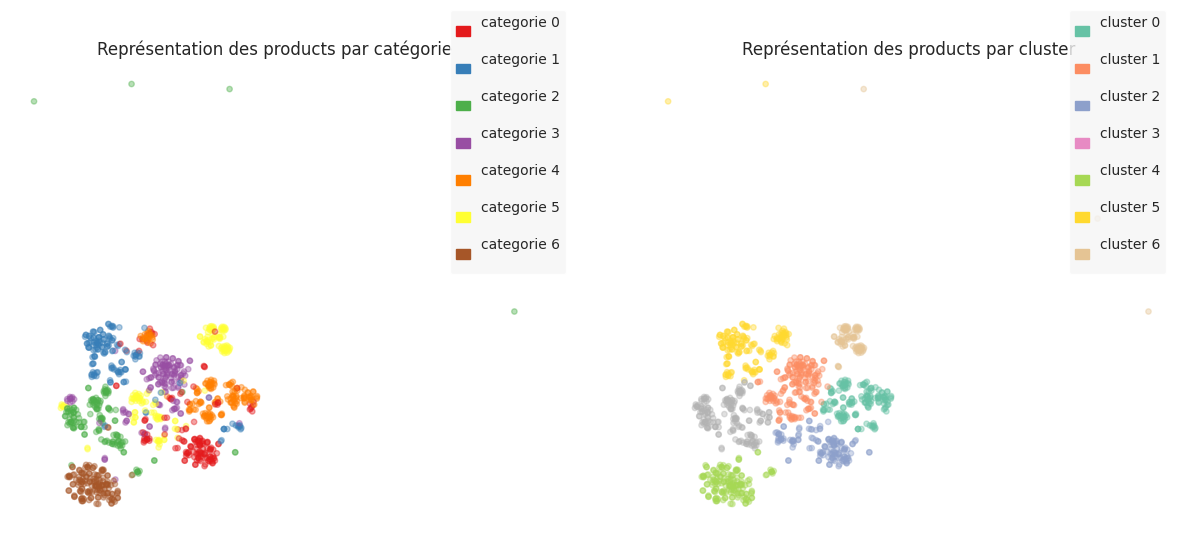

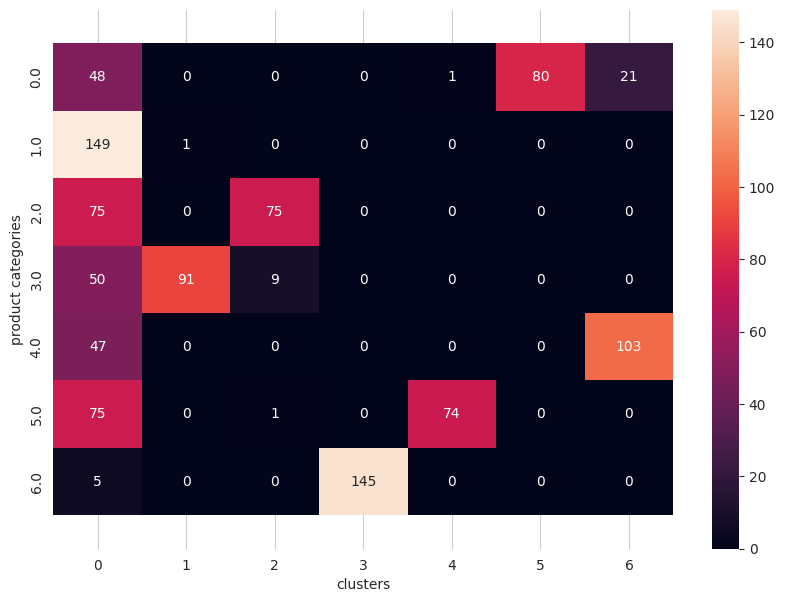

In [ ]:
param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer],
    'Corpus' : [My_data_Name_and_Description],
    'Data_fit' : [My_data_description]
    }))

for param in param_grid:
   Vector = Vectorizing(param['Method'], param['Corpus'], param['Data_fit'])
   plot_TSNE (Vector["vectorized_data"])
   Confusionmatrix((Vector["vectorized_data"]))



Via LDA

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.95,
    min_df=1,
    ngram_range=(1, 1))

# Application of the tf-idf vectorizer
corpus = My_data_Name_and_Description
tfidf_vectorizer.fit(My_data_Name_and_Description)
tf = tfidf_vectorizer.transform(corpus)

# Instanciate LDA
lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=42)

# Fitting the model
lda.fit(tf)

# Applying the model
LDA_text = lda.transform(tf)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LDA_text.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1050, 7)

In [ ]:
# pyLDAvis.sklearn.prepare(lda_tfidf, X_tfidf, tfidf, mds='tsne')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tfidf_vectorizer.get_feature_names_out ()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['_blk', '_g', '_w', ..., 'zoom', 'zora', 'zyxel'], dtype=object)

In [ ]:
type(lda.components_)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [ ]:
lda.components_.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7, 4410)

In [ ]:
len(LDA_text)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1050

In [ ]:
tablo = np.array([5, 5, 66, 44, 3, 0, 23, -5, 43, 5.4, 4])
tablo.argsort()[:-3:-1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 3])

In [ ]:
nb_of_words = 10
for topic_idx, topic_words in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join((tfidf_vectorizer.get_feature_names_out()[i]) for i in topic_words.argsort()[:-nb_of_words - 1:-1]))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
mug coffe ceram tea perfect pizza cutter gift printland enjoy
Topic 1:
wireless router jewelleri band dual asus extend vaniti ac rang
Topic 2:
showpiec tenda buddha spf best golmaalshop sunscreen neh acl nehp
Topic 3:
kadhai showpiec cell laptop pavilion best batteri handicraft dv ganesha
Topic 4:
combo set lipstick kit deodor cream massag playboy vitamin rose
Topic 5:
watch analog babi men cotton girl woman boy towel singl
Topic 6:
sticker laptop skin design vinyl eyelet mug polyest inch curtain


In [ ]:
lda.components_[0].argsort()[56]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3106

In [ ]:
lda.components_.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7, 4410)

In [ ]:
tfidf_vectorizer.get_feature_names_out ()[134]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'anthelio'

In [ ]:
LDA_text[1049,:]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.04392615, 0.0439249 , 0.04392785, 0.0439319 , 0.04392686,
       0.04392481, 0.73643753])

In [ ]:
LDA_text[1].argsort()[6]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [ ]:
LDA_text[4].argsort()[6]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [ ]:
for i in range (len(LDA_text)):
    data1.loc[i,"lda_topic"] = LDA_text[i].argsort()[6]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-139-9523cbcc8333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[i,"lda_topic"] = LDA_text[i].argsort()[6]


In [ ]:
data1["lda_topic"].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5.0    386
6.0    363
4.0    106
3.0     68
0.0     45
1.0     44
2.0     38
Name: lda_topic, dtype: int64

In [ ]:
ARI = adjusted_rand_score (data1['labels'], data1['lda_topic'])
ARI

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.20627020702673263

In [ ]:
adjusted_rand_score ([0,0,0,1,1], [1,1,1,0,0])
# Just for understangind ARI score function.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [ ]:
def plot_LDA(components):
    
       # Setting the data to plot
    labels = ['topic_{}'.format(i) for i in range(len(components))]
    frequencies = components

    # Plotting
    fig = plt.figure(figsize=(14, 6))
    plt.title("To which topic do I belong to? (LDA)", fontsize=20)
    plt.pie(frequencies,
                autopct='%.2f',
            )

    plt.legend(labels, loc='upper right', )
    # plt.show()
    # return fig



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Belonging to topics for first item
def pie_belonging (product_number):
    print(data1['product_name'].iloc[product_number])
    plot_LDA(LDA_text[product_number,:])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calibro SW-125 Analog-Digital Watch  - For Men, Boys


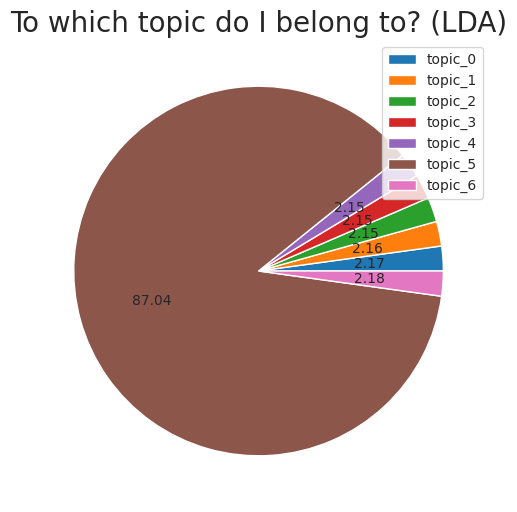

In [ ]:
pie_belonging(10)

## 2nd PART : TEXT EMBEDDING
Add a description of the three text embedding solutions used (Word2vec, BERT and USE)

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import time


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data2 = pd.read_csv("dataingoodformat.csv")
# data2 are the same dataset for in the right format to be used by WOrd2vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=7
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne
    cls = KMeans(n_clusters=num_labels, init="random", n_init='auto', random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(data2.labels_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, cls_labels, ARI) :

    idx = data2.index
    true_labels = data2.loc[idx, "labels_num"]

    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=true_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(true_labels), loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=cls_labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(cls_labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gensim.__version__

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'4.3.1'

In [ ]:

data2.Name_and_Description

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       ['key', 'featur', 'eleg', 'polyest', 'multicol...
1       ['specif', 'sathiya', 'cotton', 'bath', 'towel...
2       ['key', 'featur', 'eurospa', 'cotton', 'terri'...
3       ['key', 'featur', 'santosh', 'royal', 'fashion...
4       ['key', 'featur', 'jaipur', 'print', 'cotton',...
                              ...                        
1045    ['oren', 'empow', 'extra', 'larg', 'self', 'ad...
1046    ['wallmantra', 'larg', 'vinyl', 'sticker', 'st...
1047    ['uberlyf', 'extra', 'larg', 'pigment', 'polyv...
1048    ['wallmantra', 'medium', 'vinyl', 'sticker', '...
1049    ['uberlyf', 'larg', 'vinyl', 'sticker', 'uberl...
Name: Name_and_Description, Length: 1050, dtype: object

In [ ]:
# We use the preprocess method included in gensim
df = data2.Name_and_Description.apply(gensim.utils.simple_preprocess)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Name_and_Description'
cv_fit = cvect.fit(data2[feat])
ctf_fit = ctf.fit(data2[feat])

cv_transform = cvect.transform(data2[feat])  
ctf_transform = ctf.transform(data2[feat])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import Word2Vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dflist = df.to_list()
My_vector_size = 300

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
My_model = Word2Vec (sentences= dflist, min_count=1, vector_size = My_vector_size , window = 5)

# sentences expects a list of lists with the tokenized documents.
# vector_size defines the size of the word vectors. In this case, you set it to 100.
# workers defines how many cores you use for training. I set it to 1 to make sure the code is deterministically reproducible.
# seed sets the seed for random number generation. It's set to the constant SEED you defined in the first cell.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
words = My_model.wv


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Words is a keyed vector

In [ ]:
type(words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.models.keyedvectors.KeyedVectors

We can get a dictionnaty of it

In [ ]:
My_words_dictionnary = words.key_to_index
len(My_words_dictionnary)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3810

In [ ]:
vocab_size = len(My_words_dictionnary)
vocab_size

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3810

In [ ]:
for word, index in My_words_dictionnary.items():
    embedding_vector = words[word]
    


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
words.most_similar('flower')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('net', 0.9981979727745056),
 ('king', 0.9980862736701965),
 ('premium', 0.9980565309524536),
 ('frame', 0.9979887008666992),
 ('dual', 0.9979404211044312),
 ('pot', 0.9979211091995239),
 ('multi', 0.9979209303855896),
 ('silk', 0.997876763343811),
 ('plant', 0.9978678822517395),
 ('clean', 0.997845470905304)]

In [ ]:
import numpy as np
embedding_matrix = np.zeros((vocab_size, My_vector_size ))
embedding_matrix.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3810, 300)

But My_model is also taking into account the number of documents (ie the number of items in our list of list). see the corpus_count here below... That will help us to build the Context Matrix.

In [ ]:
My_model.corpus_count

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1050

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model:  Word Embedding MODEL (here with Gensim)

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
My_model.build_vocab(dflist)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ici On entraîne notre propre modèle avec les données du dataset

In [ ]:
My_model.train(dflist, total_examples=My_model.corpus_count, epochs=100)
model_vectors = My_model.wv
My_model_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(My_model_words))
print("Word2Vec trained")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vocabulary size: 3810
Word2Vec trained


In [ ]:
vectorized_docs = vectorize(dflist, model=My_model)
len(vectorized_docs), len(vectorized_docs[0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1050, 300)

In [ ]:
Embed = np.asarray(vectorized_docs)
Embed.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1050, 300)

In [ ]:
Embed

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.19861294, -0.53593606,  0.11791333, ...,  0.05941641,
        -0.12843765, -0.12699357],
       [ 0.0013569 ,  0.16527301,  0.31243676, ...,  0.26509553,
         0.16391206,  0.2865631 ],
       [-0.1138792 ,  0.38134849,  0.3484897 , ...,  0.16735923,
         0.15179321,  0.22085634],
       ...,
       [ 0.28359035,  0.4619785 , -0.01309894, ..., -0.24411938,
         0.38167608, -0.21968147],
       [ 0.19962156, -0.52235442, -0.33711258, ...,  0.21044935,
        -0.17632927, -0.13241938],
       [ 0.33256742,  0.05204517,  0.03745533, ...,  0.2233258 ,
         0.17273553, -0.12689778]])

In [ ]:
ARI, X_tsne, labels = ARI_fct(Embed)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI :  0.5667 time :  17.0


In [ ]:
labels

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 3, 3, ..., 6, 6, 6], dtype=int32)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


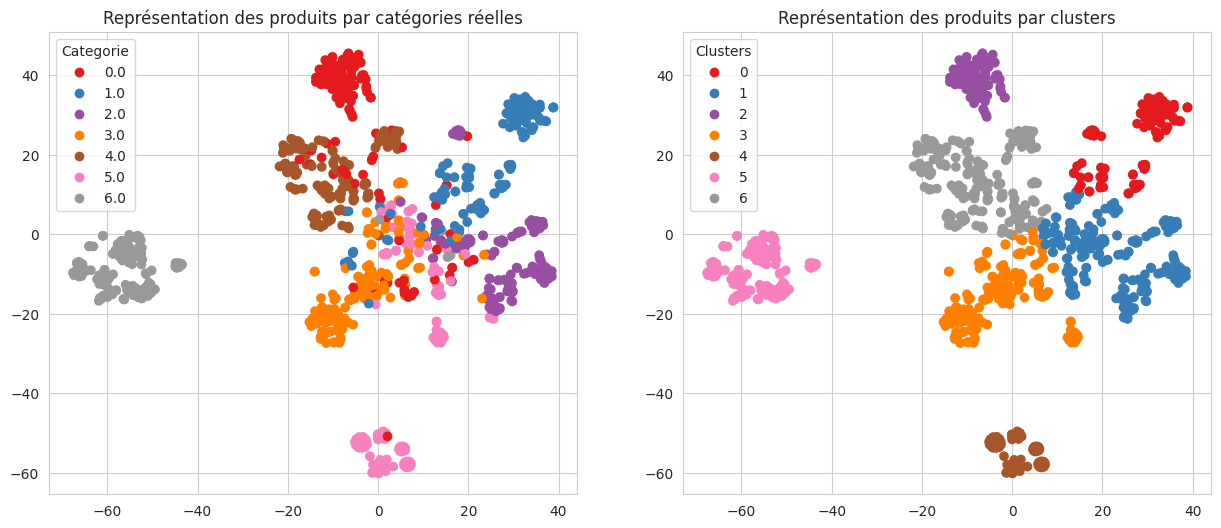

ARI :  0.5667


In [ ]:
TSNE_visu_fct(X_tsne, labels, ARI)

Logistic Regression on it

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clf = LogisticRegression(C=100)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X = vectorized_docs

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(X)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1050

In [ ]:
lb = LabelEncoder()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y= list(data1.labels)
y

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[4.0,
 0.0,
 0.0,
 4.0,
 4.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 5.0,
 4.0,
 0.0,
 4.0,
 0.0,
 1.0,
 5.0,
 5.0,
 5.0,
 2.0,
 5.0,
 1.0,
 5.0,
 2.0,
 5.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 5.0,
 5.0,
 0.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 4.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 3.0,
 5.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 0.0,
 4.0,
 4.0,
 4.0,
 0.0,
 3.0,
 0.0,
 5.0,
 0.0,
 2.0,
 3.0,
 0.0,
 3.0,
 2.0,
 4.0,
 0.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0

In [ ]:
len(X)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1050

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clf.fit(X,y)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [ ]:
# Sanity check for the sampled data
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

735
735
315
315


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
type(np.array(y))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [ ]:
y2 = clf.predict(X)
type(y2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [ ]:
y2.tolist()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[4.0,
 0.0,
 0.0,
 4.0,
 4.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 5.0,
 4.0,
 0.0,
 4.0,
 0.0,
 1.0,
 5.0,
 5.0,
 5.0,
 2.0,
 5.0,
 1.0,
 5.0,
 2.0,
 5.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 5.0,
 5.0,
 0.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 4.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 3.0,
 3.0,
 5.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 0.0,
 4.0,
 4.0,
 4.0,
 0.0,
 3.0,
 0.0,
 5.0,
 0.0,
 2.0,
 3.0,
 0.0,
 3.0,
 2.0,
 4.0,
 0.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0

In [ ]:
adjusted_rand_score (y2.tolist(),y)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [ ]:
LOG=clf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction=LOG.predict(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(prediction)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


315

In [ ]:
# Measuring accuracy on Testing Data
from sklearn import metrics
clf_report = metrics.classification_report(y_test, prediction, output_dict = True)
print(clf_report)
print(metrics.confusion_matrix(prediction, y_test))

{'0.0': {'precision': 0.7192982456140351, 'recall': 0.7884615384615384, 'f1-score': 0.7522935779816514, 'support': 52}, '1.0': {'precision': 0.9285714285714286, 'recall': 0.9512195121951219, 'f1-score': 0.9397590361445782, 'support': 41}, '2.0': {'precision': 0.9795918367346939, 'recall': 0.9795918367346939, 'f1-score': 0.9795918367346939, 'support': 49}, '3.0': {'precision': 0.9069767441860465, 'recall': 0.8478260869565217, 'f1-score': 0.8764044943820224, 'support': 46}, '4.0': {'precision': 0.8333333333333334, 'recall': 0.6976744186046512, 'f1-score': 0.759493670886076, 'support': 43}, '5.0': {'precision': 0.8666666666666667, 'recall': 0.9285714285714286, 'f1-score': 0.896551724137931, 'support': 42}, '6.0': {'precision': 0.9767441860465116, 'recall': 1.0, 'f1-score': 0.988235294117647, 'support': 42}, 'accuracy': 0.8825396825396825, 'macro avg': {'precision': 0.8873117773075307, 'recall': 0.8847635459319937, 'f1-score': 0.8846185191977999, 'support': 315}, 'weighted avg': {'precisio

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

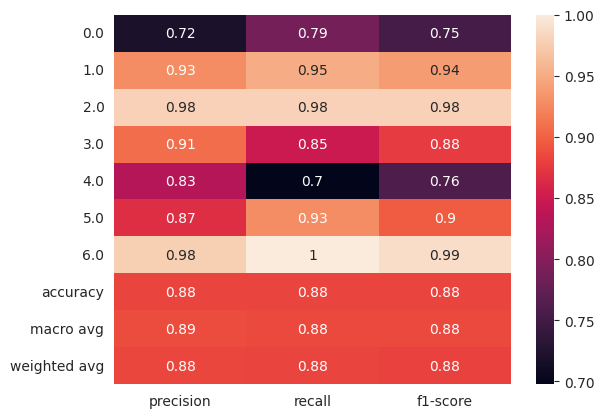

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
import seaborn as sn

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7.5, -0.5)

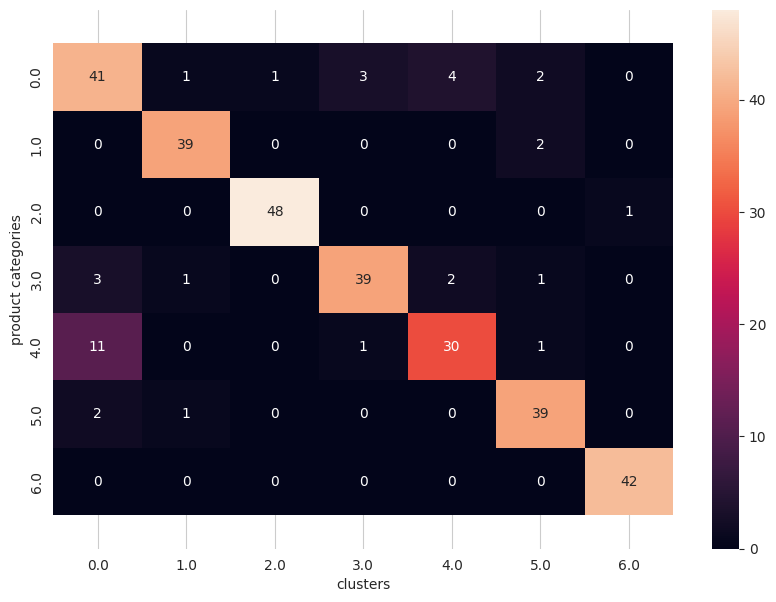

In [ ]:


    # Create crosstab: ct
    ct = pd.crosstab(y_test, prediction)

    # plot the heatmap
    plt.figure(figsize = (10,7))
    ax = sn.heatmap(ct, annot=True, fmt='g')
    ax.set_xlabel('clusters')
    ax.set_ylabel('product categories')

    # fix a displaying problem
    ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)

In [ ]:
## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.88


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
adjusted_rand_score(prediction, y_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7538977329143055

## Modèle 2 : Paramètres pour la création d'un modèle et préparation d'une liste de tokens via gensim.

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data2[feat].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Build & train Word2Vec model ...
Vocabulary size: 3810
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3811


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3811, 300)


Création d'un modèle par réseau de neurones

In [ ]:
# Création du modèle

input=tf.keras.Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=tf.keras.Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1143300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,143,300
Trainable params: 1,143,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI :  0.4397 time :  23.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


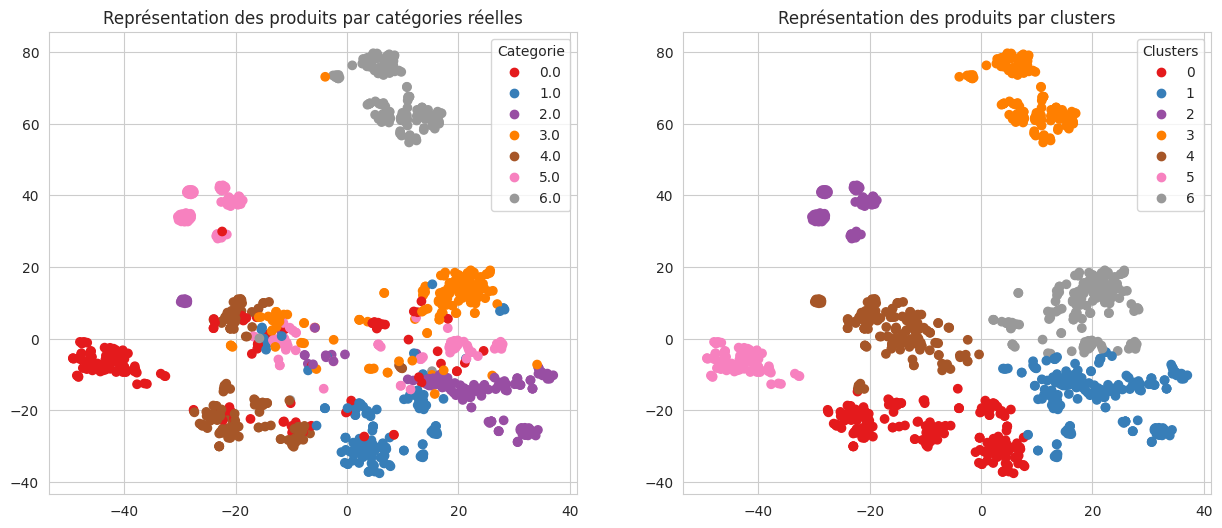

ARI :  0.4397


In [ ]:
TSNE_visu_fct(X_tsne, labels, ARI)

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3811


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   description           1050 non-null   object 
 1   product_name          1050 non-null   object 
 2   Name_and_Description  1050 non-null   object 
 3   labels_num            1050 non-null   float64
 4   label_name            1050 non-null   object 
 5   segment k_means PCA   1050 non-null   int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 45.2+ KB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data2[feat].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_filtered.to_csv("DataforW2V.csv")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


we try on an example of 10 products.

In [ ]:
test_corpus = My_data_description
len(test_corpus)
type(test_corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [ ]:
len(test_corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1050

In [ ]:
type(test_corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [ ]:
testphrase = "ANd the people you met left the country before winter comes"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
testphrase = transform_for_bagging (tokenizer,
                            testphrase, rejoin = False)
testphrase

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['peopl', 'met', 'left', 'countri', 'winter', 'come']

In [ ]:
from gensim.models import Word2Vec
My_Model = Word2Vec (testphrase, vector_size= 2, window=6)
# Essai avec vector_size=2 simplement pour faire une représentation par la suite.
# Window est la taille du voisinage pour situer le token dans son contexte.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(type(My_Model))

<class 'gensim.models.word2vec.Word2Vec'>


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dir(My_Model)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_event',
 'add_null_word',
 'alpha',
 'batch_words',
 'build_vocab',
 'build_vocab_from_freq',
 'cbow_mean',
 'comment',
 'compute_loss',
 'corpus_count',
 

In [ ]:
#  "wv" (word vector) fait la transcription vectorielle de chacun des termes.
words = My_Model.wv
type(words)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.models.keyedvectors.KeyedVectors

In [ ]:
dir(words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [ ]:
words.key_to_index

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'e': 0}

In [ ]:
words.vectors.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1, 2)

In [ ]:
words.similarity('mug', 'door')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data

    vectorizer = tfidf_vectorizer
    
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
 
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
words.most_similar('baby')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
df = pd.DataFrame(words.vectors, columns= ['V1', 'V2'], index=words.key_to_index)
df

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(df.V1, df.V2, s=0.8)
for i in range(len(df)):
    plt.annotate(df.index[i], (df.V1[i], df.V2[i]))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

<Figure size 1500x1000 with 0 Axes>

In [ ]:
noslistes = data_filtered['Name_and_Description'].to_list()
noslistes[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain  height pack price  curtain enhanc look interior curtain made  high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide draw first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyous beauti given sooth print bring home eleg curtain filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain  height pack general brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length  box number content sale packag pack sale packag curtain bodi design materi polyesteleg polyest multicolor abstract eyelet door curt

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=2
w2v_epochs=100
#  It is the number of iterations of all the dataset over the algorithm.
maxlen = 100 # adapt to length of sentences
sentences = data_filtered['description'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Création et entraînement du modèle Word2Vec
# My_Model = Word2Vec (test_corpus, vector_size= 2, window=6)

print("Build & train Word2Vec model ...")
w2v_model = Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
voca = w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Build & train Word2Vec model ...
Vocabulary size: 2834
Word2Vec trained


In [ ]:
len(w2v_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2834

In [ ]:
model_vectors["baby"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
model_vectors.most_similar("baby")

In [ ]:
model_vectors.doesnt_match(["baby", "waist", "curtain"])
# calcul le barycentre des vecteurs et calcule le terme le plus éloigné du barycentre

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'waist'

In [ ]:
model_vectors.key_to_index

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'price': 0,
 'mug': 1,
 'featur': 2,
 'design': 3,
 'specif': 4,
 'color': 5,
 'watch': 6,
 'set': 7,
 'babi': 8,
 'type': 9,
 'materi': 10,
 'pack': 11,
 'cotton': 12,
 'print': 13,
 'general': 14,
 'box': 15,
 'packag': 16,
 'sale': 17,
 'analog': 18,
 'number': 19,
 'brand': 20,
 'detail': 21,
 'qualiti': 22,
 'girl': 23,
 'inch': 24,
 'product': 25,
 'key': 26,
 'best': 27,
 'model': 28,
 'gift': 29,
 'ceram': 30,
 'fabric': 31,
 'size': 32,
 'use': 33,
 'laptop': 34,
 'warranti': 35,
 'perfect': 36,
 'great': 37,
 'made': 38,
 'showpiec': 39,
 'cover': 40,
 'boy': 41,
 'india': 42,
 'dimens': 43,
 'men': 44,
 'skin': 45,
 'usb': 46,
 'ideal': 47,
 'home': 48,
 'coffe': 49,
 'multicolor': 50,
 'content': 51,
 'one': 52,
 'light': 53,
 'make': 54,
 'combo': 55,
 'water': 56,
 'power': 57,
 'woman': 58,
 'discount': 59,
 'wash': 60,
 'black': 61,
 'width': 62,
 'give': 63,
 'love': 64,
 'batteri': 65,
 'comfort': 66,
 'care': 67,
 'blue': 68,
 'pattern': 69,
 'style': 70,
 'height':

In [ ]:
print(w2v_model)

Word2Vec<vocab=2834, vector_size=300, alpha=0.025>


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fit Tokenizer ...
Number of unique words: 3918


In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Create Embedding matrix ...
Word embedding rate :  0.7235
Embedding matrix: (3918, 300)


In [ ]:
embedding_matrix

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33585024,  0.04380424,  1.03160298, ...,  0.60287833,
         0.10554899,  0.11683437],
       [-1.5005492 ,  1.18202102, -0.37441507, ...,  0.10335304,
         1.03756905,  0.19747417],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 300)          1175400   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,175,400
Trainable params: 1,175,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


33/33 [==============================] - 0s 3ms/step


(1050, 300)

In [ ]:
embeddings.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1050, 300)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI SCORE:  0.4853266016506544


array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

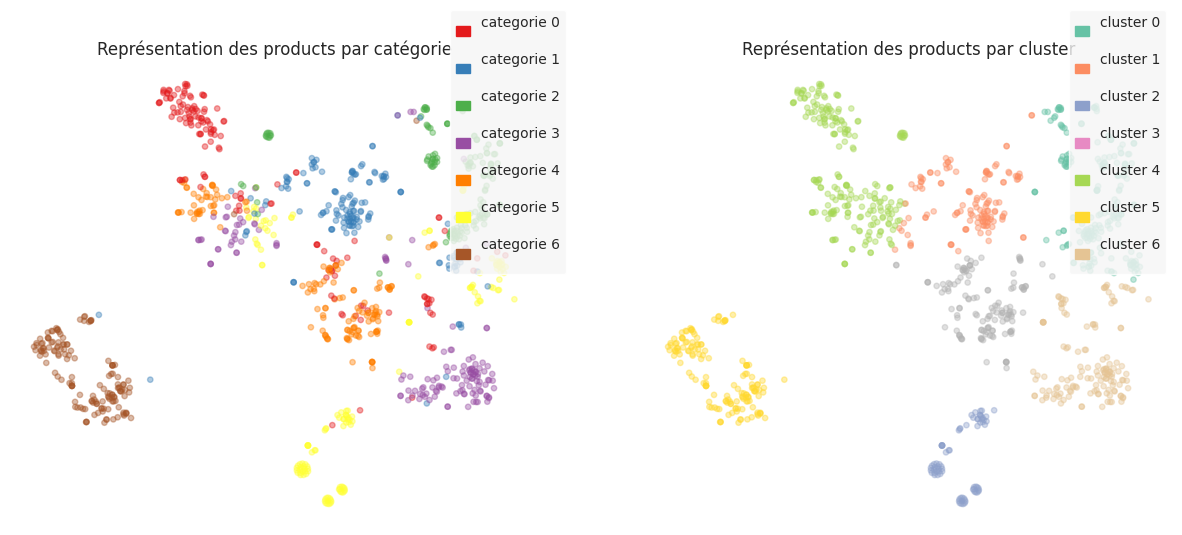

In [ ]:
plot_TSNE(embeddings)

In [ ]:
def ARI (dataframe):
     
    kmeans = KMeans (n_clusters= 7, n_init = 'auto', random_state = 42, init='random')
    kmeans.fit(dataframe)
    labels_predicted = kmeans.labels_
   
    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    return ARI

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ARI(embeddings)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.1856303915157021

## BERT

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tensorflow.keras.__version__

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2.12.0'

In [ ]:
!pip install transformers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 10.6 MB/s eta 0:00:00


In [ ]:
# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/trans

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
True


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import keras
keras.__version__

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2.12.0'

# Fonctions communes


In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bert HuggingFace

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_filtered['Name_and_Description'].to_list()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_ac

1/1 [==============================] - 3s 3s/step
temps traitement :  382.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI SCORE:  0.29320214973483405


array([1, 3, 3, ..., 6, 6, 6], dtype=int32)

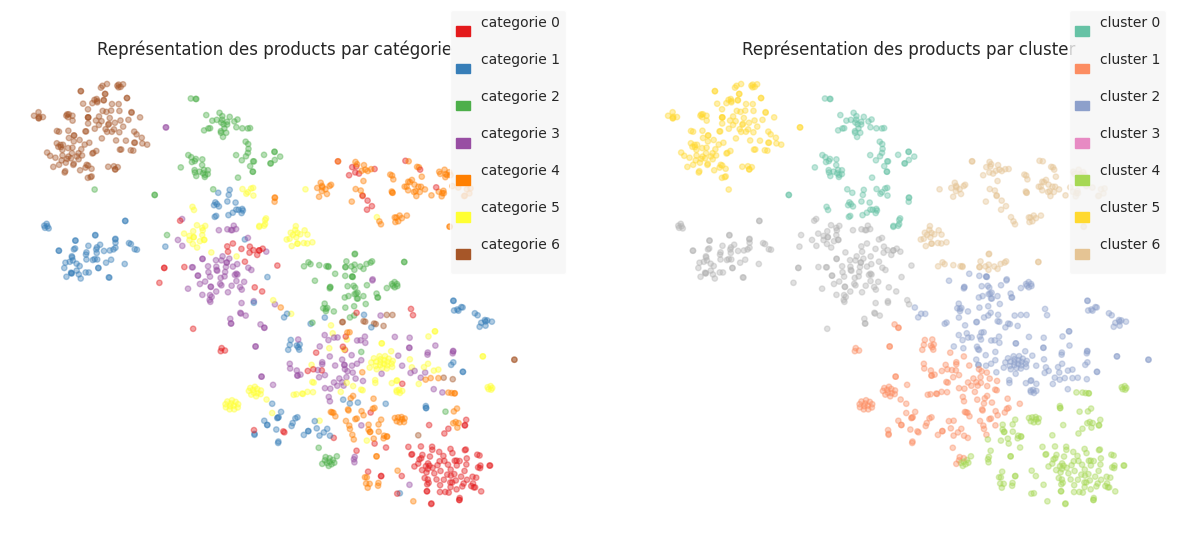

In [ ]:
plot_TSNE(features_bert)

In [ ]:
ARI(features_bert)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.24069382717377213

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI :  0.2932 time :  45.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


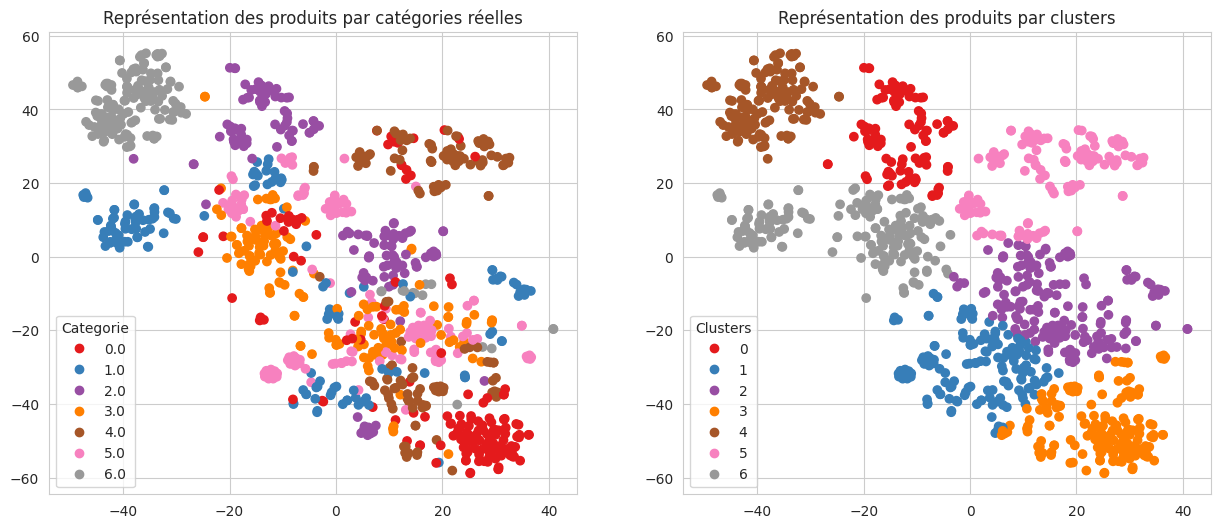

ARI :  0.2932


In [ ]:
TSNE_visu_fct(X_tsne, labels, ARI)

BERT from Tensorflow HUB

In [ ]:
!pip install tensorflow_text

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 18.2 MB/s eta 0:00:00


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text
# We are going to use tensorflow_Hub to charge BERT. The Bert version used here is 
# the lightest to reduce the time for running this cell"

# Guide sur le Tensorflow hub : "https://www.tensorflow.org/text/tutorials/classify_text_with_bert"
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'
bert_layer = hub.KerasLayer(model_url, trainable=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
My_data_description[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain  height pack price  curtain enhanc look interior curtain made  high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide draw first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyous beauti given sooth print bring home eleg curtain filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain  height pack general brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length  box number content sale packag pack sale packag curtain bodi design materi polyest'

In [ ]:
from transformers import *

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tk = word_tokenize
text = tk(My_data_description[0])
tokens = convert_tokens_to_ids(text)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LookupError: ignored

In [ ]:
sent = ['hi', 'mary']
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model_bert = BertModel.from_pretrained('bert-base-cased')
tokenizer.convert_tokens_to_ids(sent)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/config.json
Mod

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/5532cc56f74641d4bb33641f5c76a55d11f846e0/pytorch_model.bin
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClass

[20844, 100]

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def bert_encoding_for_preprocessing (texts, tokenizer, max_length = 512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)
        text = text[:max_length-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_length - len(text)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_length
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bert_encoding_for_preprocessing(My_data_description, tokenizer, max_length=100)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([[  101,  2501,  8809, ...,   102,     0,     0],
        [  101,   188, 25392, ...,     0,     0,     0],
        [  101,  2501,  8809, ...,   102,     0,     0],
        ...,
        [  101,   190,  3169, ...,     0,     0,     0],
        [  101,  2095,  1399, ...,     0,     0,     0],
        [  101,   190,  3169, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
vocab_file

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


b'/tmp/tfhub_modules/03d6fb3ce1605ad9e5e9ed5346b2fb9623ef4d3d/assets/vocab.txt'

Affichage du réseau de neurones créé

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


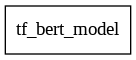

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hi

ValueError: ignored

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARI SCORE:  0.29320214973483405


array([1, 3, 3, ..., 6, 6, 6], dtype=int32)

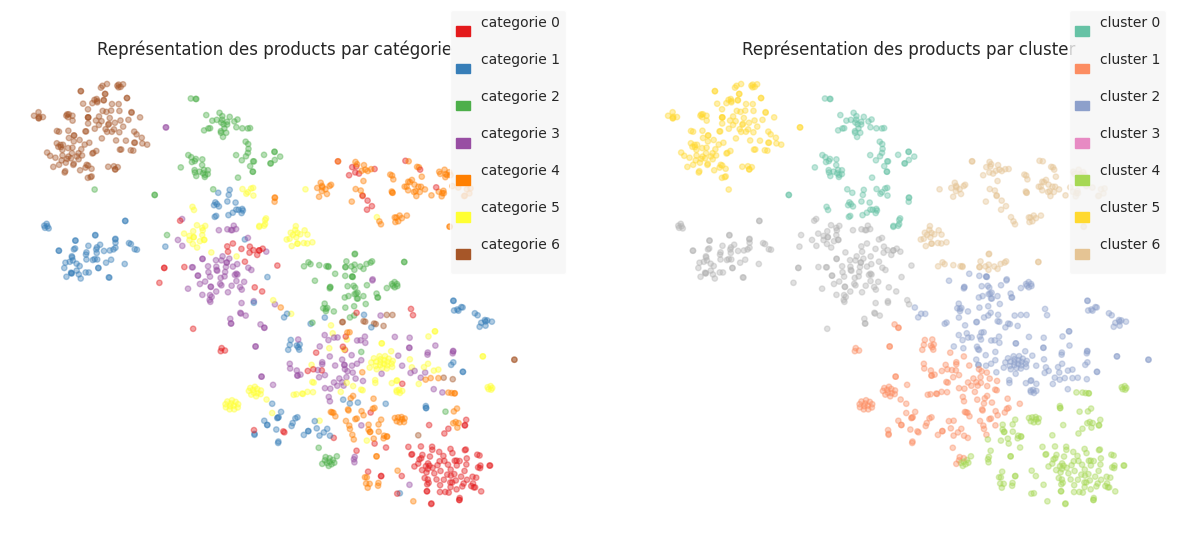

In [ ]:
plot_TSNE(features_bert)

In [ ]:
ARI(features_bert)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: ignored

USE

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = data_filtered['Name_and_Description'].to_list()

# USE - Universal Sentence Encoder

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
sentences = data2[feat].to_list()

In [ ]:
batch_size = 10
sentences = sentences

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

In [ ]:
TSNE_visu_fct(X_tsne, labels, ARI)

# IMAGE PROCESSING

In [ ]:
from os import listdir

In [ ]:
path_images = "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart/Images/"
photos_list = data1['image'].tolist()
print(len(photos_list))


In [ ]:
data1.head(5)

In [ ]:
data1['chemin_photo'] = path_images + data1['image'] 

In [ ]:
path_images_test = 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart/Images_test/'

In [ ]:
import glob


In [ ]:
data_path = []
for foto in photos_list:
    data_path.append(path_images + foto)


In [ ]:
data_path[0:5]

In [ ]:
from sklearn import preprocessing
data1["image_path"] = photos_list


In [ ]:
data1.head()
# We added the image path in the base dataset. Our goal is now to detect the image and make sure it belongs to the right category.

In [ ]:
MyLabelNames

In [ ]:
from matplotlib.image import imread
from random import *

def list_fct(name) :
    list_image_name = [photos_list[i] for i in range(len(data1)) if data1["label_name"][i]==name]
    return list_image_name

list_baby=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Baby Care"]
list_Beauty=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Beauty and Personal Care"]
list_computers=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Computers"]
list_home=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Home Decor & Festive Needs"]
list_furnishing=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Home Furnishing"]
list_kitchen=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Kitchen & Dining"]
list_watches=[photos_list[i] for i in range(len(data1)) if data1["label_name"][i]=="Watches"]

for name in MyLabelNames :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path_images + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
        plt.grid(False)
        plt.axis('off')
    plt.show()



As we can see it's not a big mess anymore !!


In [ ]:
filenameRandom = path_images + choice(photos_list)
imageRandom = imread(filenameRandom)
plt.imshow(imageRandom)

Image processing

In [ ]:
imageRandom.shape

In [ ]:
from PIL import Image

In [ ]:
n, bins, patches = plt.hist(imageRandom.flatten(), density=True, cumulative=True, bins=range(256))
plt.show()

In [ ]:
import cv2
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
def resize_image(img, size, interpolation):
    """Function to resize image without deformation."""
    
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h 
    else:     dif = w
        
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask = np.full((dif, dif), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
        
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask = np.full((dif, dif, c), fill_value=255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
        
    return cv2.resize(mask, (size, size), interpolation)

In [ ]:
squared_image=resize_image(imageRandom, size=224, interpolation=cv2.INTER_AREA)
print(squared_image.shape)
plt.imshow(squared_image)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

In [ ]:
auto_result, alpha, beta = automatic_brightness_and_contrast(squared_image)
plt.imshow(auto_result)

In [ ]:
image = cv2.imread(filenameRandom)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
# image = cv2.imread(filenameRandom) # convert in gray
# image = cv2.equalizeHist(auto_result)   # equalize image histogram
kp, des = sift.detectAndCompute(auto_result, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [ ]:
type(imageRandom)

In [ ]:
type(squared_image)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(filenameRandom, 0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

On a donc détecté 2755 descripteurs, chacun étant un vecteur de 128 dimensions.

## BAg of Visual words

In [ ]:
len(photos_list)

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create()
number_of_images = 100
for image_num in range(number_of_images) :
    if image_num%10 == 0 : print(image_num)
    image = cv2.imread(path_images+photos_list[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

ici environ 500 descripteurs par images (quand on prend que 100 images...)

on a donc des descripteurs par image == 1050 ou ici 250 listes
on a aussi une liste de descripteurs pour l'ensemble des 1050 images == 1 liste

In [ ]:
sift_keypoints_all.shape

In [ ]:
type(sift_keypoints_by_img)

In [ ]:
len(sift_keypoints_by_img)

## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, n_init='auto', init_size=3*k, random_state=42)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, descripteurs, image_num):
    res = kmeans.predict(descripteurs)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(descripteurs)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

In [ ]:
len(hist)
# The number of clusters determined by kmeans

In [ ]:
hist_vectors

In [ ]:
len(hist_vectors)

In [ ]:
len(hist_vectors[0])

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Réduction via TSNE

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data1["label_name"]
print(df_tsne.shape)

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 6}) 

plt.show()

In [ ]:
data2.head()

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init='auto', random_state=42)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data2.loc[0:(number_of_images -1), "labels_num"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
df_tsne.groupby("cluster").count()["class"]

In [ ]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

IDEM AVEC VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

In [ ]:
data1.head()

## Création des features des images

In [ ]:
images_features = []
My_prepared_images = []
i=0 
for image_file in data1["chemin_photo"]:
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image)
    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # image = preprocess_input(image)
    # My_prepared_images.append(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    My_prepared_images.append(image)
    # images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

# images_features = np.asarray(images_features)
# images_features.shape

In [ ]:
output = model.predict(My_prepared_images[0])

In [ ]:
images_features = []
for i in range(len(My_prepared_images[0:100])):
    MonImage = preprocess_input(My_prepared_images[i])
    images_features.append(model.predict(MonImage, verbose=0)[0])

In [ ]:
images_features[4].shape

In [ ]:
images_features = np.asarray(images_features)
images_features.shape


In [ ]:
# Through a PCA
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

In [ ]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=9, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data1["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
        x = X_tsne[:,0],
        y = X_tsne[:,1],
        hue="class",
        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
        data=df_tsne,
        legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 6}) 

plt.show()

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

In [ ]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x = X_tsne[:,0],
        y = X_tsne[:,1],
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data1[0:100]["labels"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

Nouvel essai sans le retrait des deux couches fully connected

In [ ]:
# Utilisation de VGG16 pré-entraîné sur ImageNet avec les images d'origine
# VGG16 imports
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Liste
vgg16_all_features = []

# Instanciation du modèle
model_vgg16 = VGG16(weights='imagenet', include_top=False)
# model_vgg16 = Model(inputs=model_vgg16.inputs, outputs=model_vgg16.layers[-2].output)
# Résumé _vde l'architecture du modèle
model_vgg16.summary()

In [ ]:
data1['chemin_photo']

In [ ]:
images_features = []
My_prepared_images = []
i=0 
for image_file in data1["chemin_photo"]:
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image)
    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # image = preprocess_input(image)
    # My_prepared_images.append(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    My_prepared_images.append(image)
    # images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

# images_features = np.asarray(images_features)
# images_features.shape

for rep_image in data1['chemin_photo']:

    # Charger l'image et la redimensionner à la taille
    # requise de 224×224 pixels.
    img = load_img(rep_image, target_size=(224, 224))
    # Convertir les pixels en un tableau NumPy afin de pouvoir travailler
    # avec dans Keras
    img = img_to_array(img)
    # Redimensionnement
    img = np.expand_dims(img, axis=0)
    # Préparer de nouvelles entrées pour le réseau.
    img = preprocess_input(img)

    # obtenir une prédiction de la probabilité d'appartenance
    # de l'image à chacun des 1000 types d'objets connus.
    vgg16_feature = model_vgg16.predict(img)
    # Ajouter la feature prédite en nparray à la liste
    vgg16_all_features.append(np.array(vgg16_feature).flatten())

vgg16_all_features = np.array(vgg16_all_features)

In [ ]:
len((vgg16_all_features)[76:78].flatten())

In [ ]:
DF = data1[['chemin_photo',	'label_name', 'labels']]

In [ ]:
DF["vvg16"] = [vgg16_all_features[i] for i in range(1050)]

In [ ]:
DF.head(5)

In [ ]:
vgg16_all_features.shape

In [ ]:
# Through a PCA
from sklearn import manifold, decomposition

print(vgg16_all_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(vgg16_all_features)
print(feat_pca.shape)

In [ ]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data1["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
        x = X_tsne[:,0],
        y = X_tsne[:,1],
        hue="class",
        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
        data=df_tsne,
        legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 6}) 

plt.show()

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init='auto')
cls.fit(X_tsne)

In [ ]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x = X_tsne[:,0],
        y = X_tsne[:,1],
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = DF["labels"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
df_vgg16_vectors = pd.DataFrame.from_records(vgg16_all_features)

In [ ]:
df_vgg16_vectors.head(5)

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
# t-SNE tuning du paramètre perplexity sans initialisation PCA
top_depart = time.time()
liste_param = [10, 20, 30, 40, 50, 80]
results_vgg16 = list()
tsne_results_vgg16 = []
for i in liste_param:
    # tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
    #                              init='random', learning_rate=200, random_state=42)
    # X_tsne = tsne.fit_transform(features)
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=500,
                random_state=42, learning_rate=200)
    tsne_results_vgg16 = tsne.fit_transform(df_vgg16_vectors)
    results_vgg16.append(tsne_results_vgg16)
print('t-SNE terminée! en : {} seconds'.format(time.time()-top_depart))

In [ ]:
results_vgg16[0].shape

In [ ]:
results_vgg16[4][:,0:2]

In [ ]:
for i in range(6):
    df_tsne = pd.DataFrame(results_vgg16[i][:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["class"] = DF["label_name"]
    print(df_tsne.shape)
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
        palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

    plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(prop={'size': 6}) 

    plt.show()

In [ ]:
tsne_results_vgg16

In [ ]:
from sklearn import cluster, metrics

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000,
                random_state=42, learning_rate=200)
tsne_results_vgg16 = tsne.fit_transform(df_vgg16_vectors)
cls = cluster.KMeans(n_clusters=7, n_init='auto', random_state=42)
cls.fit(tsne_results_vgg16)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

In [ ]:
df_tsne['true_labels'] = DF['labels'].round(0)
df_tsne['cluster'].value_counts()

In [ ]:
print("ARI : ", metrics.adjusted_rand_score(df_tsne['true_labels'], df_tsne["cluster"]))

## Dimensional reduction and analyse

In [ ]:
# Through a PCA
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

In [ ]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data1["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 6}) 

plt.show()

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

In [ ]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data1["labels"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

## Pre-Trained Model as Feature Extractor Preprocessor


In [ ]:
(My_prepared_images[0].shape)

In [ ]:
# load model
My_model = VGG16()
# remove the output layer
My_model = Model(inputs=My_model.inputs, outputs=My_model.layers[-2].output)
My_model.summary()

In [ ]:
# load model
My_model2 = VGG16()
# remove the output layer
My_model2.summary()

## IMAGE PROCESSING - Approche supervisée


In [ ]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x) #preparation d'une couche cachée par averagepooling
    x = Dense(256, activation='relu')(x) #ajout d'une couche avec une fonction d'activation
    x = Dropout(0.5)(x) #on s'arrête dès que les performances ne s'amméliorent plus pour éviter l'overfiting
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [ ]:
dataTest = data1.sample(300)
dataTest.reset_index(drop= True)
dataTest.head()

In [ ]:
myliste = data1.index.tolist()
myliste2 = [value for value in myliste if value not in (dataTest.index.tolist())]
len(myliste2)

In [ ]:
dataTest2 = data1.loc[myliste2, : ]
dataTest2= dataTest2.sample(200)

Extracting features 

In [ ]:
data1.head()

In [ ]:
def image_prep_fct(data) :
    prepared_images = []
    for i in range(len(data['chemin_photo'])) :
        img = (load_img(
            data.loc[data.index[i], 'chemin_photo'],
            target_size=(224, 224)))
    # for image_num in range(len(data['image_path'])) :
    #     img = (load_img(
    #         data['image_path'][image_num], target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np



In [ ]:
images_np = image_prep_fct(dataTest)
print(images_np.shape)


In [ ]:
images_np_test = image_prep_fct(dataTest2)
print(images_np_test.shape)

In [ ]:
images_np[0].shape

In [ ]:
from keras.utils import to_categorical

In [ ]:
X = images_np
y = to_categorical(dataTest['labels'])

X_test = images_np_test
y_test = to_categorical(dataTest2['labels'])

In [ ]:
y.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

In [ ]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=8, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

In [ ]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

In [ ]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [ ]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

In [ ]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

2e méthode supervisée :  Approche nouvelle par Dataset sans data augmentation

In [ ]:
path_images

In [ ]:
batch_size = 8

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [ ]:
path_images

In [ ]:
dataset_train = dataset_fct('C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart/Images', validation_split=0.25, data_type='training')
# dataset_val = dataset_fct(path_images, validation_split=0.25, data_type='validation')
# dataset_test = dataset_fct(path_images_test, validation_split=0, data_type=None)